# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [2]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [11]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [
0x13A5, 0x139D, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF396, 0xF396, 0xF196, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x1195, 0x1195, 0x1395, 0xF196, 0xF196, 0xF39E, 0xF39E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF196, 0xF19E, 0xF196, 0xF19E, 0xF396, 0xF196, 0xF39E, 0xF396, 0xF396, 0xF396, 0xF19E, 0xF196, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0xF196, 0xF196, 0xF196, 0x1195, 0xF196, 0xF19E, 0xF19E, 0xF396, 0xF196, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x139D, 0x1195, 0xF196, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF196, 0xF39E, 0xF39E, 0xF39E, 0x1195, 0x1195, 0xF196, 0x1195, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF396, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF396, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF39E, 0xD19E, 0xD19E, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF19E, 0xF196, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xD39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF196, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF396, 0xF396, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0xF196, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0x1195, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0x139D, 0xF196, 0xF19E, 0xF196, 0xF39E, 0xF39E, 0xF396, 0xF39E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0x1195, 0x1195, 0xF196, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF396, 0xF396, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF396, 0x1195, 0x1195, 0x1195, 0xF196, 0x1195, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0xF196, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF196, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF396, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF196, 0xF196, 0xF19E, 0xF196, 0xF196, 0x1195, 0xF196, 0xF396, 0xF196, 0xF19E, 0xF19E, 0x1195, 0xF196, 0xF196, 0xF196, 0x1195, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF396, 0xF396, 0xF196, 0xF39E, 0xF39E, 0xF39E, 0xF196, 0x1195, 0x1195, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x1195, 0xF19E, 0xF196, 0xF196, 0xF196, 0x1195, 0xF19E, 0xF196, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xD19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF196, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0x1195, 0x1195, 0xF196, 0xF396, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF396, 0x1195, 0x1195, 0xF196, 0xF196, 0xF196, 0xF196, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF19E, 0x119D, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF396, 0xF396, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF396, 0xF196, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0xF19E, 0xF396, 0x1195, 0x1195, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0x13A5, 0x13A5, 0x139D, 0x119D, 0x119D, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0xF196, 0xF396, 0xF39E, 0xF39E, 0xF39E, 0x1195, 0x1195, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0x139D, 0xF196, 0xF39E, 0xF39E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0x1195, 0xF196, 0xF196, 0xF196, 0xF196, 0xF396, 0xF39E, 0xF39E, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0xF196, 0xF19E, 0xF39E, 0xF19E, 0x119D, 0x119D, 0x1395, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF396, 0x1195, 0x1195, 0x1395, 0x1395, 0x1395, 0x1395, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF196, 0x1195, 0x1195, 0x1195, 0xF196, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF19E, 0xF39E, 0xF39E, 0xF196, 0xF19E, 0xF39E, 0xF396, 0xF39E, 0xF396, 0x1195, 0xF196, 0xF396, 0xF396, 0xF39E, 0xF396, 0x1195, 0xF196, 0x13A5, 0x13A5, 0x139D, 0x119D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0xF196, 0x1395, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x119D, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF39E, 0x1195, 0x1195, 0x1195, 0xF196, 0xF196, 0x1195, 0x1195, 0x1195, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF196, 0xF196, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF396, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF396, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0xF196, 0xF19E, 0xF39E, 0x1195, 0xF196, 0xF196, 0x1195, 0xF196, 0x119D, 0xF39E, 0x1195, 0xF196, 0xF196, 0x1395, 0x1395, 0x139D, 0xF19E, 0x139D, 0xF39E, 0x139D, 0x139D, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0xF396, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0xF19E, 0xF39E, 0x1395, 0x1195, 0x1195, 0x1195, 0xF396, 0xF396, 0x1395, 0x1395, 0xF196, 0x1195, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF196, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xD19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x1395, 0x1395, 0x1395, 0xF196, 0x1195, 0x1195, 0x1195, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF19E, 0xF39E, 0x1395, 0x1395, 0xF19E, 0xF39E, 0x1195, 0x1195, 0x1195, 0xF396, 0x1195, 0x1195, 0xF196, 0x1395, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF396, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF19E, 0xF396, 0xF396, 0xF39E, 0xF39E, 0xF396, 0xF196, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xD396, 0xD196, 0xF196, 0xF196, 0x1195, 0x1395, 0x1395, 0x1395, 0x1395, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x1395, 0x139D, 0x139D, 0x1395, 0x1395, 0xF39E, 0xF39E, 0x1395, 0x1195, 0x1195, 0xF396, 0xF196, 0xF396, 0x1395, 0x1395, 0x139D, 0xF39E, 0x139D, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0x13A5, 0x139D, 0x139D, 0xF39E, 0xF19E, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF196, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0xF39E, 0xF196, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF196, 0xF39E, 0x1395, 0x1395, 0x1195, 0xF196, 0xF396, 0x1195, 0x1195, 0x1195, 0xF39E, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0x139D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF396, 0xF39E, 0x139D, 0xF39E, 0x1195, 0x1195, 0xF196, 0xF39E, 0x139D, 0x139D, 0xF19E, 0xF19E, 0x139D, 0xF39E, 0xD19E, 0xD196, 0xF19E, 0x139D, 0x139D, 0x339D, 0x339D, 0x149D, 0xF396, 0x1195, 0x1395, 0xF196, 0xF196, 0xF196, 0xF196, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF19E, 0x119D, 0x1195, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x13A5, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x13A5, 0x13A5, 0x139D, 0x139D, 0xF19E, 0xF19E, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x119D, 0x139D, 0xF396, 0xF396, 0xF396, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF396, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x119D, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF396, 0xF396, 0xF39E, 0xF39E, 0xF196, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0xF196, 0x1195, 0x1395, 0x1395, 0x1195, 0xF196, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0x1195, 0xF19E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0x1395, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x1395, 0x1195, 0x1395, 0x1395, 0x139D, 0xF396, 0x938E, 0x327E, 0x327E, 0x3086, 0xB296, 0xF196, 0x139D, 0x139D, 0x339D, 0x349D, 0x749D, 0xF5AD, 0xF5AD, 0x769D, 0x3395, 0xF396, 0xD18E, 0xD18E, 0xD196, 0x119D, 0xF396, 0xF396, 0xF396, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x1395, 0x3395, 0x1395, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x13A5, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0x13A5, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1395, 0xF396, 0xF39E, 0xF19E, 0xF396, 0xF39E, 0xF39E, 0xF39E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0x1195, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF39E, 0xF396, 0xF396, 0xF396, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0xF196, 0xF396, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0x1395, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0x139D, 0x119D, 0x119D, 0x1195, 0x139D, 0x139D, 0xF39E, 0x1195, 0x1395, 0x1395, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x1395, 0x139D, 0xF19E, 0x7296, 0xED8C, 0x6E84, 0xCD84, 0xB296, 0x119D, 0x539D, 0x539D, 0x149D, 0x149D, 0xF496, 0xF39E, 0xB196, 0xB296, 0x51A5, 0xB4AD, 0x54A5, 0x339D, 0x73A5, 0x94A5, 0x94A5, 0x549D, 0xF396, 0xD196, 0xF196, 0xF196, 0xD196, 0xF196, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x339D, 0x139D, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF19E, 0xF39E, 0xD39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF396, 0xF19E, 0xF39E, 0x1195, 0x1195, 0x1195, 0x1195, 0xF39E, 0xF39E, 0xF39E, 0x1395, 0x1395, 0xF396, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x1195, 0x1195, 0xF196, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0x1395, 0x1395, 0x1395, 0x1195, 0x1195, 0x1195, 0x1195, 0xF39E, 0x139D, 0x139D, 0x1195, 0x1395, 0x139D, 0xF39E, 0x139D, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x1395, 0x1395, 0xF396, 0x337E, 0xB16C, 0xD074, 0xF0A6, 0xF1CD, 0x16DF, 0x77E7, 0x99F7, 0x9BF7, 0x9CEF, 0x9BD7, 0xFAAD, 0x1795, 0x968E, 0x938E, 0x139D, 0x539D, 0x349D, 0x74A5, 0x569D, 0x749D, 0xD4A5, 0x77B7, 0x97B7, 0x37B7, 0x749D, 0x349D, 0xF396, 0xF196, 0xF196, 0xB18E, 0xD196, 0xF196, 0xF19E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x339D, 0x139D, 0x139D, 0x119D, 0x119D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xD19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xD39E, 0xF196, 0x1195, 0x1195, 0xF196, 0xF396, 0x1395, 0x1195, 0x1195, 0xF19E, 0x1195, 0xF39E, 0xF196, 0xF196, 0xF19E, 0xF396, 0xF196, 0x1195, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x1195, 0x1195, 0x1195, 0xF196, 0xF396, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF396, 0xF196, 0xF19E, 0xF39E, 0xF19E, 0x119D, 0x1195, 0x1195, 0x1395, 0x1395, 0x1195, 0x1195, 0x1195, 0x1195, 0xF39E, 0x139D, 0x1395, 0x1195, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x1395, 0x139D, 0x139D, 0xF19E, 0x5296, 0xAD84, 0x8D84, 0x9074, 0x19B7, 0x5BBF, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DCF, 0x9EC7, 0x9ECF, 0x9DDF, 0x9DDF, 0x9CD7, 0x9AC7, 0x57BF, 0x15B7, 0x15B7, 0x77C7, 0x97C7, 0x35BF, 0x94A5, 0xF6AD, 0x37AF, 0x37AF, 0x57AF, 0xD7A5, 0x1395, 0x9196, 0x9196, 0x918E, 0xF19E, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0x1395, 0x1195, 0x1195, 0x1195, 0x1195, 0xF196, 0xF396, 0xF396, 0xF19E, 0xF396, 0x1395, 0x1395, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF196, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF396, 0x1395, 0x1395, 0xF39E, 0x139D, 0x139D, 0x1395, 0x139D, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x1395, 0x1395, 0x3395, 0x139D, 0x139D, 0x339D, 0xB38E, 0xF174, 0x926C, 0xD074, 0x50AD, 0x33D7, 0x57E7, 0x1AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9CEF, 0x9BE7, 0x99DF, 0x99DF, 0x9BDF, 0x59BF, 0x37AF, 0x98C7, 0x99C7, 0x9ABF, 0x9AC7, 0x57B7, 0x55BF, 0x96AD, 0x93A5, 0x349D, 0x539D, 0x339D, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0x119D, 0xF39E, 0xF396, 0xF396, 0xF396, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0x119D, 0x139D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x1395, 0x1395, 0x139D, 0x1395, 0x1195, 0x1395, 0x139D, 0x1395, 0x1395, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0xD196, 0xCF8C, 0x6E84, 0x8D84, 0xB38E, 0x39B7, 0x7BC7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9ED7, 0x99C7, 0x9ABF, 0x58B7, 0x98CF, 0x9BDF, 0x9BE7, 0x9BC7, 0x58B7, 0x759D, 0x549D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x339D, 0x139D, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF396, 0x1195, 0x1195, 0xF196, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0x1395, 0x1395, 0x1395, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0xF396, 0x1395, 0x1395, 0x1395, 0x1395, 0x139D, 0x139D, 0x1395, 0x139D, 0x1395, 0x139D, 0xF396, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x1395, 0xD38E, 0x7386, 0xD174, 0x9074, 0x6F96, 0x10D7, 0x15DF, 0x37E7, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9CD7, 0x99BF, 0x9ACF, 0x9BD7, 0x9CD7, 0x9BC7, 0x58B7, 0xD6AD, 0x74A5, 0x339D, 0x339D, 0x349D, 0x339D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x13A5, 0x139D, 0x139D, 0x139D, 0x119D, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x1195, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0x1195, 0x1195, 0x1195, 0x1195, 0x1395, 0xF396, 0x1395, 0x1395, 0x1195, 0x139D, 0x139D, 0x139D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0xF39E, 0x319D, 0x9296, 0xED8C, 0xAD8C, 0xF084, 0x95A5, 0x59BF, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EE7, 0x9CCF, 0x9AC7, 0x9ACF, 0x99CF, 0x99CF, 0x78B7, 0xD5AD, 0x56A5, 0x349D, 0x349D, 0x34A5, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x13A5, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0x1395, 0x139D, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0x1395, 0x1195, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0x1195, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x1395, 0x139D, 0x139D, 0x339D, 0x3395, 0xB386, 0x137E, 0xB26C, 0xF27C, 0x50AD, 0x34D7, 0x57DF, 0x7AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9CD7, 0x99C7, 0x9AC7, 0x9BCF, 0x9BCF, 0x99BF, 0x37B7, 0xB6AD, 0x74A5, 0x549D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF196, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x1395, 0x1195, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x139D, 0xF39E, 0xB296, 0xF8E, 0x8E84, 0xCD84, 0x1695, 0x39B7, 0x7BC7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9CD7, 0x99C7, 0x99C7, 0x9BD7, 0x9BD7, 0x9BD7, 0x7ABF, 0xD5AD, 0x369D, 0x53A5, 0x539D, 0x339D, 0x539D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x1395, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x1395, 0x1195, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x1395, 0x948E, 0xF174, 0xD274, 0x9096, 0x32D7, 0x35DF, 0x38E7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9BC7, 0x99C7, 0x9BD7, 0x9BD7, 0x9CCF, 0x99BF, 0xF7B5, 0x96A5, 0x53A5, 0x549D, 0x339D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x139D, 0x139D, 0xF396, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x1195, 0x1195, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xD19E, 0x7096, 0xCD8C, 0x6E84, 0xAF84, 0x77A5, 0x59B7, 0x9BDF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9CD7, 0x9BCF, 0x99D7, 0x9CDF, 0x9CDF, 0x99C7, 0x37B7, 0x96AD, 0x54A5, 0x54A5, 0x339D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x119D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0xD19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x1195, 0x119D, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0x1195, 0x1195, 0x139D, 0xF39E, 0xF39E, 0x1195, 0x1195, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x339D, 0x339D, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x1395, 0x1395, 0xB38E, 0x337E, 0xD274, 0x1086, 0x90BD, 0x14DF, 0x17E7, 0x3AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9ED7, 0x9BCF, 0x99D7, 0x9CDF, 0x9CD7, 0x9CC7, 0x58B7, 0xB6AD, 0x74A5, 0x549D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x339D, 0x339D, 0x339D, 0x139D, 0x13A5, 0x13A5, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x139D, 0x119D, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0x339D, 0xF39E, 0xF19E, 0xF19E, 0x1195, 0x1195, 0x1195, 0x119D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x119D, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0x139D, 0x139D, 0xF39E, 0x139D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x119D, 0x7296, 0xF8E, 0xCF84, 0xB396, 0x39B7, 0x9BCF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9BCF, 0x9BCF, 0x9CD7, 0x9CDF, 0x9CD7, 0x78BF, 0xF5AD, 0x76A5, 0x349D, 0x34A5, 0x349D, 0x34A5, 0x349D, 0x349D, 0x339D, 0x539D, 0x339D, 0x139D, 0x13A5, 0x119D, 0x11A5, 0x119D, 0x139D, 0xF19E, 0xF19E, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0x119D, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0x1195, 0x119D, 0x1195, 0x119D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x139D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0x139D, 0x339D, 0x5386, 0x337E, 0xB26C, 0x5086, 0xB2BD, 0x36D7, 0x58DF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x9CD7, 0x9BCF, 0x9CD7, 0x9CDF, 0x9CD7, 0x9BBF, 0x37B7, 0xF6AD, 0x569D, 0x549D, 0x34A5, 0x34A5, 0x349D, 0x349D, 0x549D, 0x339D, 0x339D, 0x119D, 0x13A5, 0xF19E, 0x119D, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF19E, 0x119D, 0xF19E, 0xF39E, 0x119D, 0x1195, 0x1195, 0x119D, 0x119D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0x119D, 0xF19E, 0xF19E, 0x1195, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0xF39E, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x339D, 0x139D, 0x9296, 0xEF94, 0x8D84, 0xF084, 0x77A5, 0x59B7, 0x9BCF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9CD7, 0x9BCF, 0x9BD7, 0x9CDF, 0x9CDF, 0x9BCF, 0x17B7, 0xB5AD, 0x169D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x349D, 0x339D, 0x339D, 0x339D, 0x119D, 0x13A5, 0x139D, 0x13A5, 0x13A5, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0x119D, 0x1195, 0x1195, 0x119D, 0x119D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF19E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x339D, 0x1395, 0x9386, 0xD274, 0xF27C, 0x30B5, 0x34DF, 0x37E7, 0x79EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9CD7, 0x9CD7, 0x9EDF, 0x9EDF, 0x9ED7, 0x99BF, 0x15AF, 0x569D, 0x54A5, 0x34A5, 0x34A5, 0x349D, 0x34A5, 0x349D, 0x339D, 0x339D, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0x139D, 0xF39E, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x119D, 0xF39E, 0xF39E, 0x139D, 0xF19E, 0xF39E, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0x339D, 0x33A5, 0xD29E, 0x2F96, 0x8D84, 0x8D8C, 0x1086, 0xD7AD, 0x59C7, 0x9BF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9CD7, 0x9CD7, 0x9ED7, 0x9EDF, 0x9CDF, 0x9ACF, 0x17AF, 0x759D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x349D, 0x34A5, 0x339D, 0x339D, 0x13A5, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF39E, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x119D, 0x139D, 0xF39E, 0xF19E, 0x139D, 0x139D, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF19E, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0x139D, 0x139D, 0x1395, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0x9386, 0xF174, 0xB074, 0xD27C, 0x10AD, 0x51D7, 0x37DF, 0x57EF, 0x79EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9CD7, 0x9CD7, 0x9EDF, 0x9EDF, 0x9CCF, 0x5AB7, 0xB5A5, 0x74A5, 0x54A5, 0x54A5, 0x53A5, 0x539D, 0x339D, 0x339D, 0x339D, 0x13A5, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0x119D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0x139D, 0x139D, 0xF39E, 0xF19E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x119D, 0x119D, 0x119D, 0xF39E, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0xD196, 0x5096, 0xCD8C, 0x8D84, 0x1086, 0xB7AD, 0x39B7, 0x5CBF, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9CD7, 0x9CD7, 0x9CD7, 0x9EDF, 0x9CDF, 0x99C7, 0xD7AD, 0x559D, 0x54A5, 0x54A5, 0x549D, 0x53A5, 0x339D, 0x339D, 0x339D, 0x13A5, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x119D, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x119D, 0xF19E, 0x119D, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x139D, 0x1395, 0xB48E, 0xD174, 0x926C, 0xB074, 0x7096, 0x92BD, 0x34CF, 0x35D7, 0x7AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9CD7, 0x9CD7, 0x9EDF, 0x9CDF, 0x9CC7, 0x58B7, 0xF5AD, 0x96A5, 0x54A5, 0x549D, 0x549D, 0x549D, 0x349D, 0x339D, 0x139D, 0x139D, 0xF19E, 0x119D, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF39E, 0xF39E, 0xF3A6, 0xF3A6, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x119D, 0x119D, 0x119D, 0x119D, 0xF19E, 0xF19E, 0x139D, 0xF39E, 0xF39E, 0x119D, 0x119D, 0x119D, 0x139D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x139D, 0x139D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xD19E, 0x9096, 0xF8E, 0xAD84, 0x8D84, 0xF08C, 0x169D, 0x3AB7, 0x3BB7, 0x9CDF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EDF, 0x9CD7, 0x9CD7, 0x9CDF, 0x9EE7, 0x9CDF, 0x9AC7, 0xD7AD, 0x369D, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x349D, 0x339D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0x119D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF3A6, 0xF39E, 0xF39E, 0x119D, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0x119D, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x339D, 0x339D, 0x139D, 0x139D, 0x139D, 0x139D, 0x938E, 0xF17C, 0x9074, 0xB274, 0x3286, 0x32AD, 0x54AD, 0x34D7, 0x35DF, 0x9AEF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9ED7, 0x9CD7, 0x9CDF, 0x9EE7, 0x9EDF, 0x9CCF, 0x58B7, 0xB5AD, 0x54A5, 0x53A5, 0x54A5, 0x34A5, 0x349D, 0x349D, 0x139D, 0x139D, 0x119D, 0x119D, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x139D, 0x139D, 0x119D, 0xF19E, 0xF19E, 0xF1A6, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x119D, 0x119D, 0x119D, 0xF19E, 0x139D, 0xF39E, 0x139D, 0xF39E, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x339D, 0x339D, 0xF396, 0xB29E, 0xF8E, 0xAD8C, 0xCD8C, 0xD19E, 0xD7AD, 0x59B7, 0x9CCF, 0x9EEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9CD7, 0x9CDF, 0x9EEF, 0x9EE7, 0x9CDF, 0x78BF, 0xB7AD, 0x559D, 0x54A5, 0x34A5, 0x34A5, 0x349D, 0x349D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0x119D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0x139D, 0xF39E, 0x139D, 0xF39E, 0xF19E, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF396, 0x938E, 0x5386, 0xD274, 0x906C, 0xB074, 0xD27C, 0x728E, 0x32CF, 0x35DF, 0x77E7, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9CD7, 0x9CDF, 0x9EEF, 0x9DEF, 0x9EE7, 0x9BC7, 0x58B7, 0x95A5, 0x73A5, 0x53A5, 0x34A5, 0x34A5, 0x349D, 0xF39E, 0x139D, 0x139D, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x119D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x119D, 0x139D, 0x139D, 0x339D, 0x119D, 0x7296, 0xCD8C, 0x8E8C, 0xAD84, 0x918E, 0xF7AD, 0x39B7, 0x3CB7, 0x7EC7, 0x9ED7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9CD7, 0x9CD7, 0x9EE7, 0x9DEF, 0x9DEF, 0x9CDF, 0x18B7, 0x559D, 0x34A5, 0x53A5, 0x349D, 0x549D, 0x349D, 0xF39E, 0xF39E, 0x139D, 0x119D, 0x139D, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0x119D, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0xF19E, 0x119D, 0x119D, 0x139D, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x139D, 0x139D, 0xF39E, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39E, 0xF39E, 0x918E, 0x127E, 0x906C, 0x8F6C, 0xD07C, 0x10AD, 0x33DF, 0x37E7, 0x78EF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9CD7, 0x9EE7, 0x9DEF, 0x9DEF, 0x9EDF, 0x79BF, 0xD7AD, 0x56A5, 0x53A5, 0x349D, 0x549D, 0x349D, 0xF19E, 0x139D, 0xF39E, 0xF19E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x119D, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0x139D, 0x139D, 0x139D, 0x139D, 0xF19E, 0x929E, 0xCF8C, 0x6E8C, 0x8E8C, 0xEF8C, 0xD39E, 0x17B7, 0x5AB7, 0x7BC7, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9DEF, 0x9DEF, 0x9EE7, 0x9CCF, 0x18AF, 0x95A5, 0x54A5, 0x349D, 0x34A5, 0x34A5, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x119D, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x339D, 0x938E, 0x117E, 0x906C, 0x9074, 0xB07C, 0xD0A6, 0x11D7, 0x15DF, 0x55EF, 0x98EF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DEF, 0x9DE7, 0x9ED7, 0x79B7, 0xF7AD, 0xB4AD, 0x74A5, 0x549D, 0x549D, 0x139D, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x119D, 0x119D, 0x13A5, 0xD1A6, 0x7296, 0x2F96, 0xCD8C, 0xAD84, 0xB196, 0xF7B5, 0x5AB7, 0x7BC7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DEF, 0x9EE7, 0x99C7, 0x17AF, 0x76A5, 0x34A5, 0x34A5, 0x34A5, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xD396, 0xB38E, 0x5286, 0x3286, 0x528E, 0xD29E, 0xB1BD, 0x36DF, 0x57DF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9CCF, 0x7ABF, 0xD5AD, 0x53A5, 0x34A5, 0x54A5, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0xF39E, 0x139D, 0xF39E, 0xB19E, 0x7096, 0xEF8C, 0xAD84, 0xF8E, 0xD1A6, 0x13A5, 0xB6B5, 0x99E7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9CDF, 0x99CF, 0xF7B5, 0x76A5, 0x169D, 0x54A5, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0x139D, 0x139D, 0x918E, 0x718E, 0x7196, 0xD19E, 0x51AD, 0xF3C5, 0x76D7, 0x98EF, 0x9CF7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DEF, 0x9EE7, 0x9CD7, 0x79BF, 0xF5AD, 0x54A5, 0x54A5, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x339D, 0x93A5, 0x94A5, 0x94AD, 0xF4B5, 0x96D7, 0x9BF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DEF, 0x9DEF, 0x9EE7, 0x9BCF, 0xF8AD, 0x359D, 0x349D, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0xF39E, 0xF19E, 0x119D, 0xF19E, 0x139D, 0x139D, 0xF39E, 0xF4AD, 0x77B7, 0x97BF, 0x97BF, 0x97CF, 0x9BE7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9DEF, 0x9DF7, 0x9DEF, 0x9ED7, 0x79BF, 0xD5AD, 0x74A5, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF19E, 0x139D, 0x13A5, 0x139D, 0xB3AD, 0x76BF, 0x95C7, 0x98C7, 0x99DF, 0x9EEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DF7, 0x9DF7, 0x9EE7, 0x9BD7, 0xF7AD, 0x75A5, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0xF3A6, 0x13A5, 0x73A5, 0x16B7, 0x75BF, 0x97BF, 0x99DF, 0x9EEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x5AB7, 0xF5AD, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0x139D, 0x13A5, 0x339D, 0x16B7, 0x75BF, 0x77BF, 0x9ADF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9DDF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9EE7, 0x79C7, 0xD7AD, 0xD19E, 0xF19E, 0xD19E, 0xF19E, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0xF19E, 0xF19E, 0x119D, 0xF39E, 0x139D, 0x33A5, 0x53A5, 0xF4B5, 0x77BF, 0x97BF, 0x98CF, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9CCF, 0x7ABF, 0xD19E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x119D, 0x139D, 0x139D, 0x139D, 0x139D, 0xD4AD, 0x97BF, 0x97BF, 0x98C7, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9DEF, 0x9DF7, 0x9DEF, 0x9EE7, 0x99CF, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x339D, 0x13A5, 0xB4AD, 0x77BF, 0x97BF, 0x98C7, 0x99E7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9CCF, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0x139D, 0x139D, 0x139D, 0x339D, 0x139D, 0x94AD, 0x97C7, 0x97BF, 0x98BF, 0x9AE7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9EDF, 0xD19E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x33A5, 0x51AD, 0x55BF, 0x78BF, 0x98C7, 0x9ADF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DEF, 0x9DEF, 0x9DE7, 0xD19E, 0xD19E, 0xF19E, 0xD19E, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xF39E, 0x139D, 0xF6B5, 0x97BF, 0x98BF, 0x98D7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9ED7, 0x9EDF, 0x9DE7, 0x9DEF, 0x9DEF, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x51A5, 0xD4B5, 0x97C7, 0x98BF, 0x98CF, 0x9CE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DEF, 0x9DF7, 0xD19E, 0xD19E, 0xD196, 0xD196, 0xF196, 0xD196, 0xF196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xD19E, 0xD19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0xB4A5, 0x95C7, 0x97BF, 0x9AC7, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9ED7, 0x9EDF, 0x9DEF, 0x9DF7, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xD196, 0xF19E, 0xD196, 0xD196, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xD19E, 0xD19E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0x139D, 0x33A5, 0x71A5, 0x36B7, 0x77B7, 0x98C7, 0x9ADF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9ED7, 0x9EE7, 0x9DF7, 0xD196, 0xD196, 0xD196, 0xD196, 0xF196, 0xF196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0x119D, 0xF39E, 0xD39E, 0xF19E, 0xF39E, 0xF39E, 0xF39E, 0xF39E, 0x339D, 0x36B7, 0x97BF, 0x98BF, 0x9ADF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9ED7, 0x9EDF, 0x9DEF, 0xD19E, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0xF39E, 0xD39E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x31A5, 0x14B7, 0x75BF, 0x98BF, 0x98D7, 0x9EEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EDF, 0x9EE7, 0xD19E, 0xD196, 0xD19E, 0xD196, 0xD19E, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xD19E, 0xF19E, 0xD39E, 0xF19E, 0xF196, 0xF19E, 0xF19E, 0xF39E, 0xF39E, 0x339D, 0xB6AD, 0x55B7, 0x77B7, 0x98CF, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EDF, 0x9EE7, 0xB19E, 0xD296, 0xB296, 0xD19E, 0xD19E, 0xD196, 0xD19E, 0xB19E, 0xD19E, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x31A5, 0xB3AD, 0x16B7, 0x57B7, 0x97CF, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DDF, 0x9EDF, 0xD296, 0xB296, 0xD296, 0xD29E, 0xD196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xF196, 0xD19E, 0xD19E, 0xD19E, 0xD19E, 0xD19E, 0xF39E, 0xF19E, 0xF39E, 0x119D, 0x53A5, 0xF6AD, 0x55B7, 0x78BF, 0x99E7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0x9EDF, 0xD296, 0xB296, 0xB196, 0xD29E, 0xD196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xF196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0x319D, 0x73A5, 0xD4AD, 0x35B7, 0x77BF, 0x9AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DDF, 0xD296, 0xB296, 0xD296, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF39E, 0x339D, 0xD4AD, 0x57B7, 0x77BF, 0x98DF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xD296, 0xD296, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xD196, 0xD19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0xF19E, 0x139D, 0x319D, 0x94AD, 0x16B7, 0x35BF, 0x97D7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB296, 0xD296, 0xD196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xD196, 0xF196, 0xF196, 0xF196, 0xF196, 0xF19E, 0xF39E, 0x139D, 0x94AD, 0xF6B5, 0x55B7, 0x97CF, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB296, 0xD196, 0xD196, 0xD196, 0xB196, 0xD196, 0xD19E, 0xD19E, 0xB196, 0xD19E, 0xD196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0x93AD, 0xF6AD, 0x55B7, 0x95C7, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB296, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xF196, 0xF196, 0xF196, 0xF19E, 0x51A5, 0xF4AD, 0x35B7, 0x55B7, 0x9ADF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xB296, 0xB196, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xD196, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xF196, 0xF196, 0xF196, 0xF19E, 0x52A5, 0xD6AD, 0x55B7, 0x75BF, 0x98DF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xB296, 0xB296, 0xB296, 0xB296, 0x9296, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xB196, 0xD196, 0xD196, 0xD196, 0xF196, 0xF196, 0xF19E, 0xF19E, 0x519D, 0xF4AD, 0x75B7, 0x55B7, 0x98D7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB196, 0xD196, 0xB196, 0xB296, 0xB196, 0xB196, 0xB196, 0xD196, 0xB196, 0xD196, 0xD19E, 0xD196, 0xD196, 0xF196, 0xF19E, 0xF19E, 0xF19E, 0xB3AD, 0x55B7, 0x77BF, 0x75C7, 0x9BF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9296, 0x9196, 0xB296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xD196, 0xF19E, 0xD19E, 0xD396, 0xB4A5, 0x56B7, 0x55B7, 0x58BF, 0x99EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB296, 0xD196, 0xD196, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xD19E, 0xD19E, 0xD196, 0xD196, 0xD196, 0xD19E, 0xF19E, 0x73A5, 0x16B7, 0x77B7, 0x97BF, 0x9AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0x9296, 0x918E, 0x9296, 0xB296, 0xB196, 0x9196, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD19E, 0xD196, 0x319D, 0x16B7, 0x75BF, 0x37AF, 0x98D7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB296, 0x9196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xD19E, 0xD19E, 0xD19E, 0xF19E, 0x51A5, 0xF4B5, 0x77BF, 0x77B7, 0x97C7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DCF, 0x9296, 0x9296, 0x9296, 0x9296, 0xB296, 0x9296, 0xB296, 0xB296, 0x9296, 0xB296, 0xB296, 0xB196, 0x9196, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xF19E, 0xF196, 0xB4AD, 0x95BF, 0x77B7, 0x98C7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x99D7, 0x77AD, 0x9596, 0x9296, 0xB296, 0x9296, 0x9296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0x9296, 0xB296, 0x9196, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xB196, 0xD196, 0xD196, 0xF19E, 0xD196, 0x71A5, 0x56B7, 0x57B7, 0x57BF, 0x99E7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DCF, 0x1BB7, 0x56A5, 0x128E, 0xD07C, 0x328E, 0x928E, 0x9296, 0x9296, 0x9296, 0x9296, 0x9296, 0x928E, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB196, 0x9196, 0x9196, 0xB196, 0xB196, 0xD196, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0x339D, 0x36B7, 0x35B7, 0x17AF, 0x98DF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9ABD, 0xF59E, 0x3486, 0xD17C, 0xF86, 0x928E, 0xD396, 0xD39E, 0x9296, 0xB296, 0x9296, 0x9296, 0x9296, 0x928E, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xD296, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xF196, 0x319D, 0xF4B5, 0x37B7, 0x78BF, 0x98DF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x7DC7, 0xD9B5, 0xF4A6, 0xD084, 0xF084, 0x3286, 0x9196, 0xD19E, 0xD19E, 0xD196, 0xD196, 0x928E, 0x928E, 0x9296, 0x9296, 0x928E, 0x928E, 0x9296, 0x9296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0x9296, 0x9196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xF196, 0xF196, 0x1395, 0xF4AD, 0x55B7, 0x38B7, 0x97CF, 0x9EEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x5AD7, 0xB8B5, 0x778E, 0xF37C, 0xF07C, 0x728E, 0xF196, 0xF196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0x928E, 0x928E, 0x9296, 0x9296, 0x928E, 0x928E, 0x9296, 0x9296, 0x9296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xB296, 0xB296, 0xB196, 0xB196, 0xD196, 0xF196, 0xF196, 0xF19E, 0xB3AD, 0xF6AD, 0x37B7, 0x75C7, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x9EC7, 0xDAB5, 0xD4A6, 0xD084, 0xAF7C, 0x1086, 0x718E, 0xB196, 0xB196, 0xB296, 0xB196, 0xD196, 0xB196, 0xD196, 0xD296, 0xB296, 0xB196, 0x928E, 0x9296, 0x7296, 0x9296, 0x928E, 0xB28E, 0xB28E, 0x9296, 0x9296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB196, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xD196, 0xD196, 0xD196, 0xB18E, 0x94A5, 0xF6B5, 0x17B7, 0x37B7, 0x99EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CE7, 0x78AD, 0x758E, 0x137E, 0x5286, 0xB28E, 0xD196, 0xB18E, 0xD18E, 0xD196, 0xD196, 0xD396, 0xB18E, 0xD18E, 0xB196, 0xB196, 0xB196, 0xB196, 0xB296, 0xB18E, 0x928E, 0x9296, 0x7296, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xB296, 0xB296, 0xB296, 0xB296, 0xB196, 0xD196, 0xD196, 0xD196, 0x93A5, 0xF6AD, 0x17B7, 0x57BF, 0x9AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x5DBF, 0xD9B5, 0x15A5, 0x5196, 0xB07C, 0x1086, 0x728E, 0xB196, 0xD196, 0xB196, 0xD196, 0xD196, 0xD196, 0xB196, 0x918E, 0xB196, 0xB18E, 0xB296, 0xB296, 0xB196, 0xB296, 0xB296, 0xB28E, 0x9296, 0x9296, 0x9296, 0x9296, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0xB28E, 0xB28E, 0xB28E, 0x9296, 0xB28E, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xB296, 0xB296, 0xB196, 0xD196, 0xD196, 0xB196, 0x139D, 0xD4AD, 0x15B7, 0xF7AD, 0x97DF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x3AD7, 0x37A5, 0x968E, 0xD474, 0xD074, 0x3286, 0x928E, 0xB196, 0xD396, 0xD396, 0xB18E, 0xB18E, 0xB196, 0xB18E, 0xD196, 0xD196, 0xB18E, 0xB18E, 0xB18E, 0xB28E, 0xB18E, 0x928E, 0xB296, 0x918E, 0x928E, 0x928E, 0x7096, 0x7296, 0x7296, 0x9296, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x928E, 0x928E, 0x9296, 0x9296, 0xB296, 0xB296, 0xB296, 0xB196, 0xB296, 0xB296, 0xB296, 0xB196, 0xB196, 0xB196, 0xD19E, 0x119D, 0x54A5, 0xD6AD, 0x15B7, 0x75CF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DD7, 0x7EC7, 0x57AD, 0xB49E, 0x108E, 0xF084, 0x328E, 0x9196, 0xD196, 0xF39E, 0xF396, 0xD196, 0xD196, 0xD196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB18E, 0xB296, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x9296, 0x928E, 0x928E, 0x928E, 0x7296, 0x7296, 0x7296, 0x7296, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB296, 0x9296, 0x9296, 0xB196, 0x9296, 0xB296, 0xB196, 0xB196, 0xB196, 0xB19E, 0xB19E, 0xB196, 0x54A5, 0xF6B5, 0xD5AD, 0x35C7, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0xFAC5, 0x17A5, 0x5486, 0x117E, 0x1286, 0x728E, 0x928E, 0xD396, 0xD196, 0x1195, 0xD396, 0xD396, 0xD196, 0xD196, 0xD18E, 0xB196, 0xD196, 0xD196, 0xB196, 0xB196, 0xB18E, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x708E, 0x908E, 0x9296, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x7296, 0x7296, 0x928E, 0x9296, 0x9296, 0x9296, 0x9296, 0x9196, 0x9196, 0xB196, 0xB196, 0xB196, 0xB19E, 0xB19E, 0xB196, 0x139D, 0xB4AD, 0xF6AD, 0x15BF, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DDF, 0x9DC7, 0x1CBF, 0xD69E, 0x939E, 0xB07C, 0xEF84, 0x3286, 0x718E, 0xF196, 0xD396, 0xD196, 0xD196, 0xD196, 0xB196, 0xB196, 0x9196, 0x9196, 0x928E, 0xB196, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x928E, 0x728E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x7296, 0x928E, 0x928E, 0xB296, 0x9296, 0x928E, 0x918E, 0x9196, 0x9196, 0x9196, 0x9196, 0xB196, 0xB196, 0xB196, 0x9396, 0xF396, 0xD4AD, 0xF6AD, 0xF5AD, 0x98DF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9BEF, 0xD8A6, 0x7496, 0x137E, 0xF27C, 0x3086, 0x5286, 0xD196, 0xB18E, 0xD18E, 0xD18E, 0xD18E, 0xD196, 0xD396, 0xB196, 0xB18E, 0xB18E, 0xB196, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x728E, 0x928E, 0x908E, 0x908E, 0x908E, 0x708E, 0x708E, 0x708E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x928E, 0x9296, 0x9296, 0x928E, 0x928E, 0x9296, 0x9296, 0x9196, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xF19E, 0xB3AD, 0xF4AD, 0x16B7, 0x97DF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DCF, 0x9DC7, 0x58AD, 0xD6A6, 0x3296, 0xAF7C, 0x308E, 0x928E, 0xD196, 0xF396, 0xD196, 0xD196, 0xD196, 0xD18E, 0xD196, 0xB196, 0xB196, 0xD196, 0xB196, 0xB196, 0xB296, 0xB18E, 0xB18E, 0xB18E, 0x918E, 0x918E, 0xB28E, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x728E, 0x728E, 0x908E, 0x708E, 0x708E, 0x708E, 0x728E, 0x708E, 0x908E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0x928E, 0x928E, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0xB296, 0xB196, 0xB196, 0xB196, 0xB196, 0xF196, 0xB3A5, 0xD4A5, 0xD6AD, 0x97D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x99EF, 0x9AC5, 0xF5A6, 0x748E, 0x5386, 0x3286, 0x728E, 0x928E, 0xF396, 0xD396, 0xD196, 0xD196, 0xD196, 0xD196, 0xD18E, 0xD18E, 0xD18E, 0xB18E, 0xB18E, 0xB18E, 0x928E, 0xB28E, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x908E, 0x928E, 0x928E, 0x9286, 0x9286, 0x728E, 0x7286, 0x7286, 0x728E, 0x7286, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x908E, 0x908E, 0x908E, 0x928E, 0x9296, 0x928E, 0x9296, 0x928E, 0x9296, 0x9296, 0x928E, 0xB28E, 0xB296, 0x9296, 0x9296, 0xB296, 0xB296, 0xB196, 0xB196, 0xD196, 0xF29E, 0x91A5, 0xD6A5, 0x16AF, 0xF5BD, 0x9BF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DCF, 0x7DBF, 0xDAB5, 0x749E, 0xF28C, 0xB084, 0x308E, 0x528E, 0x918E, 0x918E, 0xB196, 0xB196, 0xD196, 0xD196, 0xD196, 0xB196, 0xB296, 0xB28E, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x908E, 0x708E, 0x7286, 0x928E, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x728E, 0x708E, 0x708E, 0x908E, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x7296, 0x928E, 0x928E, 0x9296, 0xB28E, 0xB28E, 0x928E, 0xB296, 0xB296, 0xB196, 0xB196, 0xD196, 0xB196, 0x31A5, 0xD4AD, 0xF6AD, 0xF7AD, 0x9AEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CEF, 0x39D7, 0xF8A6, 0x7486, 0x337E, 0x5286, 0x7286, 0xD196, 0xB18E, 0xD196, 0xB196, 0xB18E, 0xD196, 0xD196, 0xD196, 0xD196, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xD18E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x708E, 0x708E, 0x7086, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7286, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x728E, 0x708E, 0x908E, 0x908E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0x7296, 0x928E, 0x928E, 0x9296, 0x928E, 0xB28E, 0x9296, 0xB296, 0xB196, 0xB296, 0xB196, 0xB196, 0xD196, 0x32A5, 0x94A5, 0xF6AD, 0x16B7, 0x98E7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DD7, 0x9DBF, 0x5CBF, 0x16A5, 0xF18C, 0xB284, 0xD084, 0x3286, 0x718E, 0x918E, 0xB18E, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xB196, 0xB196, 0xB28E, 0xB18E, 0xB18E, 0xB18E, 0xB196, 0xB28E, 0xB18E, 0xB18E, 0xB28E, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x928E, 0x9086, 0x908E, 0x708E, 0x728E, 0x728E, 0x728E, 0x708E, 0x708E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x908E, 0x908E, 0x708E, 0x908E, 0x928E, 0x928E, 0x728E, 0x728E, 0x928E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB296, 0x928E, 0x928E, 0xB196, 0xB196, 0xB196, 0xD196, 0x1195, 0xB4A5, 0xF6AD, 0xD6A5, 0x97D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x79DF, 0xBA9E, 0x3486, 0xD17C, 0x327E, 0x5086, 0x928E, 0xB18E, 0xB18E, 0xB18E, 0xD18E, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xB196, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0xB18E, 0xB18E, 0x918E, 0x928E, 0x928E, 0x918E, 0x918E, 0x928E, 0x928E, 0x928E, 0x9186, 0x9186, 0x9286, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x908E, 0x7086, 0x7086, 0x908E, 0x728E, 0x728E, 0x728E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x728E, 0x728E, 0x728E, 0x708E, 0x708E, 0x708E, 0x708E, 0x908E, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xD296, 0xB196, 0xB196, 0xB196, 0xD296, 0x53A5, 0xD6AD, 0x16AF, 0x35BF, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DCF, 0x9ECF, 0x17A5, 0x749E, 0xD08C, 0xD084, 0x528E, 0x718E, 0xD296, 0xD196, 0xB196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xD196, 0xB196, 0xB196, 0xB196, 0xB196, 0xB28E, 0xB28E, 0xB296, 0xB18E, 0x918E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9286, 0x9286, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x908E, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x7086, 0x708E, 0x708E, 0x728E, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x7286, 0x728E, 0x728E, 0x708E, 0x708E, 0x708E, 0x708E, 0x908E, 0x908E, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x928E, 0xB296, 0x928E, 0x928E, 0x918E, 0x9196, 0x9196, 0x73A5, 0xD6AD, 0xF5AD, 0xF7AD, 0x99E7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9BEF, 0x1AAD, 0xB69E, 0x1486, 0x1186, 0x1286, 0x718E, 0xD196, 0xD196, 0xD396, 0xB196, 0xD196, 0xD196, 0xD196, 0xD18E, 0xD18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0x918E, 0x918E, 0x918E, 0xB196, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9286, 0x9286, 0x9286, 0x7286, 0x9286, 0x9086, 0x9286, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x708E, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x908E, 0x908E, 0x908E, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0x9296, 0x9196, 0xD196, 0x51A5, 0xD6AD, 0xF5AD, 0x15B7, 0x9AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DCF, 0x9DC7, 0x9AB5, 0x5396, 0x1196, 0xD084, 0xF284, 0x528E, 0x728E, 0x918E, 0xD196, 0xD196, 0xB196, 0xB196, 0xB196, 0xB296, 0xB296, 0xB196, 0xB18E, 0xB28E, 0xB18E, 0xB296, 0xB296, 0xB28E, 0x928E, 0x928E, 0xB28E, 0x9296, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9286, 0x9086, 0x7086, 0x7286, 0x7286, 0x7286, 0x928E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x708E, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x9086, 0x9086, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0x9196, 0x9196, 0x119D, 0xD6AD, 0xF6AD, 0xF5AD, 0x97D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0xB9C5, 0x9796, 0x337E, 0xD17C, 0xD07C, 0x3286, 0x918E, 0xB18E, 0xD396, 0xD196, 0xD196, 0xD18E, 0xD18E, 0xB18E, 0xB18E, 0xB196, 0xB196, 0xB196, 0xB18E, 0xB18E, 0xB28E, 0xB28E, 0xB18E, 0xB18E, 0xB28E, 0x928E, 0x928E, 0xB28E, 0xB28E, 0x928E, 0x9286, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x9286, 0x9286, 0x9286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x508E, 0x708E, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x508E, 0x508E, 0x708E, 0x708E, 0x7086, 0x7086, 0x708E, 0x908E, 0x908E, 0x708E, 0x908E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9296, 0x9296, 0x9296, 0x9296, 0x129D, 0x73A5, 0xB5AD, 0xF5AD, 0x16B7, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DD7, 0x9DC7, 0xDBB5, 0xB59E, 0x339E, 0xD08C, 0xD284, 0x528E, 0x518E, 0x9196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xD196, 0xB196, 0xB18E, 0xB28E, 0xB18E, 0xB196, 0xB196, 0xB296, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0xB286, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x728E, 0x9286, 0x9086, 0x9086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x7086, 0x708E, 0x5086, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x508E, 0x508E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x708E, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0xB296, 0x73A5, 0xD6AD, 0xF5AD, 0x37B7, 0x9BEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9BEF, 0x3ADF, 0x9A9E, 0x3386, 0x117E, 0xF27C, 0x3286, 0x5286, 0x918E, 0xB18E, 0xD196, 0xD196, 0xD196, 0xB196, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB28E, 0xB28E, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0xB28E, 0xB286, 0xB286, 0xB286, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9286, 0x9286, 0x9286, 0x9286, 0x9286, 0x928E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x9286, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x3086, 0x5086, 0x5086, 0x708E, 0x5086, 0x508E, 0x708E, 0x508E, 0x508E, 0x508E, 0x508E, 0x508E, 0x708E, 0x708E, 0x508E, 0x508E, 0x708E, 0x708E, 0x708E, 0x708E, 0x728E, 0x728E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB096, 0x31A5, 0xB6AD, 0xF5AD, 0x35BF, 0x99EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DD7, 0x7DBF, 0x3BC7, 0x949E, 0xB28C, 0x6F84, 0xAF84, 0x328E, 0x528E, 0x918E, 0xB196, 0xB196, 0xB196, 0xB196, 0xD196, 0xD196, 0xB196, 0xB196, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB196, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0xB286, 0xB286, 0x9286, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x9286, 0x9286, 0x9286, 0x9286, 0x9286, 0x908E, 0x708E, 0x708E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x708E, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x4F86, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x508E, 0x5086, 0x708E, 0x708E, 0x5086, 0x4F8E, 0x508E, 0x508E, 0x708E, 0x708E, 0x7086, 0x708E, 0x708E, 0x708E, 0x708E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x319D, 0xD6AD, 0x15B7, 0xD5AD, 0x97D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x99EF, 0x58C5, 0x3596, 0xF184, 0x9174, 0xD07C, 0x3086, 0x728E, 0xB18E, 0x918E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0x918E, 0xB18E, 0xB28E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x928E, 0x9286, 0x9286, 0x728E, 0x9286, 0x9086, 0x9086, 0x9086, 0x9086, 0x7086, 0x708E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x4F86, 0x4F86, 0x5086, 0x507E, 0x5086, 0x3086, 0x3086, 0x5086, 0x4F86, 0x4F86, 0x5086, 0x508E, 0x508E, 0x5086, 0x3086, 0x508E, 0x708E, 0x508E, 0x508E, 0x508E, 0x708E, 0x708E, 0x508E, 0x708E, 0x708E, 0x728E, 0x728E, 0x708E, 0x708E, 0x708E, 0x708E, 0x928E, 0x928E, 0x928E, 0x908E, 0xB296, 0xF29E, 0x74A5, 0xF5B5, 0x15B7, 0x35C7, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DC7, 0x5EB7, 0x3CBF, 0x38AD, 0xF18C, 0x908C, 0xD7C, 0x8F7C, 0xF084, 0x5286, 0x928E, 0x928E, 0xB196, 0xB196, 0xB196, 0xB196, 0xB28E, 0x928E, 0xB196, 0x918E, 0x918E, 0x928E, 0x928E, 0x918E, 0x928E, 0x918E, 0xB18E, 0xB18E, 0xB18E, 0x928E, 0x918E, 0x928E, 0xB28E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x708E, 0x708E, 0x928E, 0x728E, 0x728E, 0x7286, 0x7286, 0x9086, 0x9086, 0x9086, 0x9086, 0x7086, 0x708E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x6F86, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x4F86, 0x5086, 0x5086, 0x508E, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x508E, 0x708E, 0x7286, 0x7086, 0x7086, 0x708E, 0x708E, 0x728E, 0x728E, 0x928E, 0x928E, 0x928E, 0x918E, 0x74A5, 0xD6B5, 0xF5AD, 0x57C7, 0x9CF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x3ADF, 0x57B5, 0x7696, 0x9374, 0x526C, 0x506C, 0xD07C, 0x3286, 0x7286, 0xB18E, 0xB196, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB18E, 0xB28E, 0xB18E, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x918E, 0x928E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x708E, 0x708E, 0x928E, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x9086, 0x9086, 0x9086, 0x9086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x3086, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x4F86, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x508E, 0x3086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x708E, 0x508E, 0x708E, 0x708E, 0x7086, 0x7086, 0x708E, 0x708E, 0x708E, 0x728E, 0x728E, 0x928E, 0x928E, 0x908E, 0x319D, 0xB6AD, 0xD6AD, 0x16BF, 0x99EF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x9DBF, 0x5EB7, 0x3EBF, 0xD7A6, 0xD194, 0xD7C, 0xE74, 0x6F7C, 0x308E, 0x518E, 0x718E, 0x918E, 0x918E, 0xB296, 0xB28E, 0xB196, 0xB18E, 0xB18E, 0x918E, 0x928E, 0xB28E, 0xB28E, 0x928E, 0xB28E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x728E, 0x728E, 0x708E, 0x728E, 0x728E, 0x728E, 0x7286, 0x7286, 0x7086, 0x9086, 0x7086, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F86, 0x2F86, 0x2F86, 0x2F86, 0x3086, 0x3086, 0x3086, 0x3086, 0x5086, 0x508E, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x508E, 0x528E, 0x5086, 0x708E, 0x7086, 0x708E, 0x708E, 0x708E, 0x728E, 0x728E, 0x728E, 0x5286, 0x119D, 0xF6AD, 0x15AF, 0xF7AD, 0x9AE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x3AEF, 0x18E7, 0xD7B6, 0xD684, 0x726C, 0x3064, 0x6F6C, 0xF07C, 0x5286, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x918E, 0x928E, 0x928E, 0x928E, 0x918E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x918E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x928E, 0x728E, 0x728E, 0x7286, 0x7286, 0x7286, 0x728E, 0x728E, 0x728E, 0x7086, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x5086, 0x507E, 0x507E, 0x507E, 0x4F86, 0x5086, 0x5086, 0x507E, 0x507E, 0x507E, 0x4F7E, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x3086, 0x3086, 0x4F86, 0x4F86, 0x4F86, 0x508E, 0x3086, 0x5086, 0x4F86, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x508E, 0x508E, 0x5086, 0x508E, 0x508E, 0x708E, 0x708E, 0x708E, 0x708E, 0x728E, 0x728E, 0x908E, 0x109D, 0xD3B5, 0x16B7, 0x15B7, 0x97CF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DD7, 0x9DBF, 0x7EB7, 0x3CBF, 0x18AD, 0xD18C, 0x5084, 0xEE7B, 0xE7C, 0x8F7C, 0x1086, 0x728E, 0x928E, 0x928E, 0x918E, 0x9196, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x7286, 0x7086, 0x7086, 0x908E, 0x708E, 0x708E, 0x7086, 0x7086, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x6F86, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x507E, 0x507E, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F86, 0x5086, 0x4F86, 0x3086, 0x3086, 0x3086, 0x2F86, 0x3086, 0x5086, 0x4F7E, 0x4F86, 0x5086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x708E, 0x708E, 0x708E, 0x508E, 0x5086, 0x5086, 0x528E, 0x9296, 0x938E, 0x74B5, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x5AEF, 0xF8DD, 0xD7A6, 0xD47C, 0x526C, 0x2F64, 0x4F6C, 0xAF74, 0x1086, 0x5286, 0x728E, 0x928E, 0x928E, 0x918E, 0x918E, 0x928E, 0x918E, 0x728E, 0x928E, 0x928E, 0x928E, 0x918E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x9286, 0x9286, 0xB286, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x728E, 0x928E, 0x928E, 0x728E, 0x9286, 0x9286, 0x9286, 0x9286, 0x928E, 0x928E, 0x728E, 0x728E, 0x728E, 0x9286, 0x9286, 0x7286, 0x728E, 0x728E, 0x7286, 0x7286, 0x9286, 0x9286, 0x7086, 0x928E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x507E, 0x5086, 0x507E, 0x507E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x4F86, 0x4F86, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x5086, 0x4F7E, 0x2F86, 0x2F86, 0x4F86, 0x4F86, 0x4F86, 0x2F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F86, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x508E, 0x508E, 0x5086, 0x708E, 0x708E, 0x708E, 0x508E, 0x3086, 0xF86, 0xEF7C, 0xF074, 0xD8AD, 0x7BBF, 0x9CDF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x5DBF, 0x3EB7, 0x1CBF, 0xF7A6, 0xD18C, 0x2F84, 0xED73, 0xE74, 0x6F7C, 0xF084, 0x508E, 0x7286, 0x7286, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x928E, 0x728E, 0x928E, 0x928E, 0x928E, 0x728E, 0x728E, 0x928E, 0x928E, 0x928E, 0x908E, 0xB08E, 0x928E, 0x928E, 0x728E, 0x728E, 0x728E, 0x928E, 0x728E, 0x9286, 0x9286, 0x9286, 0x928E, 0x928E, 0x928E, 0x928E, 0x928E, 0x908E, 0x908E, 0x928E, 0x728E, 0x728E, 0x9286, 0x9286, 0x9286, 0x9286, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x7286, 0x7086, 0x728E, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x507E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x2F86, 0x2F86, 0x4F86, 0x4F86, 0x5086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7286, 0x127E, 0x926C, 0xEF63, 0xF6C, 0xCF84, 0x90A6, 0xF1CD, 0x58DF, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CF7, 0x3AEF, 0xF7E5, 0xF7B6, 0x767C, 0xF263, 0xEF63, 0x2D64, 0x8F74, 0x1086, 0x107E, 0x5286, 0x9286, 0x928E, 0x7286, 0x728E, 0x7286, 0x9286, 0x9286, 0x928E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x7286, 0x7286, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x7086, 0x7086, 0x908E, 0x928E, 0x728E, 0x9286, 0x9286, 0x9286, 0x9286, 0x7286, 0x7286, 0x9286, 0x7286, 0x728E, 0x928E, 0x9286, 0x9286, 0x9086, 0x7086, 0x9286, 0x728E, 0x7286, 0x7286, 0x7286, 0x7286, 0x9286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x507E, 0x507E, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x4F7E, 0x4F7E, 0x5086, 0x4F86, 0x4F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0x2D7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x4F86, 0x2F86, 0x2F86, 0x4F86, 0x4F86, 0x2F86, 0x2F86, 0x4F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x7086, 0x5086, 0x3086, 0x5086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x708E, 0x908E, 0x508E, 0x1086, 0xED84, 0x8E7C, 0x2C7C, 0x4E74, 0x548E, 0x7BCF, 0x9BF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DC7, 0x3DB7, 0x1CBF, 0x7696, 0x7284, 0xED7B, 0xAC73, 0xCC73, 0x6D7C, 0xD084, 0x3086, 0x7086, 0x7086, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x7086, 0x728E, 0x728E, 0x728E, 0x728E, 0x528E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x728E, 0x708E, 0x708E, 0x728E, 0x728E, 0x728E, 0x7286, 0x7286, 0x7086, 0x7286, 0x7286, 0x9286, 0x728E, 0x728E, 0x728E, 0x7286, 0x7086, 0x7086, 0x728E, 0x728E, 0x728E, 0x728E, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x5286, 0x5286, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F7E, 0x4F7E, 0x4F86, 0x5086, 0x4F86, 0x4F7E, 0x4F7E, 0x4F86, 0x4F7E, 0x4F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x2D7E, 0x2D7E, 0x2D7E, 0x2D7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x4F86, 0x5086, 0x507E, 0x3086, 0x3086, 0x3086, 0x5086, 0x3086, 0x5086, 0x3086, 0x3086, 0x3086, 0x4F86, 0x5086, 0x5086, 0x5086, 0x5086, 0x3086, 0x5086, 0x3086, 0x5086, 0x5086, 0x7086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x3286, 0xB074, 0x1064, 0x2F74, 0xEEB6, 0xB1D5, 0xB6DD, 0xD6DD, 0x96C5, 0x368E, 0x516C, 0x1064, 0x4D6C, 0xAF7C, 0x107E, 0x5086, 0x5086, 0x728E, 0x918E, 0x728E, 0x7286, 0x7286, 0x7086, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7286, 0x728E, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7286, 0x7286, 0x7086, 0x7086, 0x708E, 0x728E, 0x728E, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x728E, 0x7286, 0x7086, 0x7086, 0x7286, 0x7286, 0x7286, 0x9286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7286, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5286, 0x5286, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x707E, 0x507E, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x5086, 0x2F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x3086, 0x2F86, 0x2F86, 0x2F86, 0x3086, 0x3086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x2F86, 0x2F86, 0x4F86, 0x4F86, 0x4F86, 0x2F86, 0x3086, 0x3086, 0x4F86, 0x2F86, 0x3086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x508E, 0x508E, 0x3086, 0x3086, 0xEF84, 0x6E7C, 0xA973, 0x4A6B, 0x2A6B, 0x6963, 0xEC6B, 0x6D74, 0xEF84, 0x308E, 0x308E, 0x308E, 0x508E, 0x508E, 0x708E, 0x528E, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7086, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x708E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x708E, 0x7286, 0x7286, 0x7086, 0x7086, 0x7286, 0x7286, 0x7286, 0x7286, 0x728E, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x507E, 0x4F7E, 0x4F86, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x3086, 0x3086, 0x5086, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F86, 0x2F86, 0x3086, 0x3086, 0x2F86, 0x4F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0xF7E, 0xF7E, 0xD7E, 0xED7C, 0xED74, 0x2D7E, 0x2D7E, 0xD7E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x307E, 0x307E, 0x2F7E, 0x2F7E, 0x3086, 0x3086, 0x3086, 0x2F86, 0x4F86, 0x4F86, 0x4F86, 0x2F86, 0x2F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x3086, 0x3086, 0x4F86, 0x2F86, 0x3086, 0x3086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x928E, 0x7286, 0x728E, 0x7286, 0x7286, 0x7286, 0x5286, 0x5086, 0x508E, 0x7286, 0x5286, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x5286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7286, 0x7286, 0x728E, 0x728E, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x507E, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x507E, 0x507E, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x3086, 0x3086, 0x507E, 0x507E, 0x507E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F86, 0x307E, 0x307E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0x2F7E, 0xF7E, 0xF7E, 0xD7E, 0xD7E, 0xD7E, 0x2D76, 0x2D76, 0xD76, 0x2F86, 0xF86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x3086, 0x4F86, 0x4F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x4F86, 0x4F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x3086, 0x3086, 0x3086, 0x3086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x3086, 0x5086, 0x7086, 0x708E, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x508E, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x9286, 0x7286, 0x7286, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7286, 0x508E, 0x508E, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x4F86, 0x5086, 0x3086, 0x507E, 0x307E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0xD76, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0x2D7E, 0xD7E, 0xED7C, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0x2D7E, 0xD76, 0xF86, 0xF7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x3086, 0x3086, 0x3086, 0x307E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F86, 0x2F86, 0x4F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x3086, 0x3086, 0x3086, 0x2F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7286, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x7086, 0x7286, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x507E, 0x307E, 0x307E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F76, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F76, 0x2F76, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xD76, 0xD7E, 0xD76, 0xD76, 0xD7E, 0xD7E, 0xD7E, 0xED74, 0xED74, 0xF86, 0xF86, 0xF86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0xF86, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x4F86, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F86, 0x3086, 0x3086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0x2D7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0xD7E, 0x2D7E, 0xD76, 0xD76, 0xD76, 0xD7E, 0xD7E, 0xD7E, 0xED7C, 0xED7C, 0xD76, 0xD76, 0xD7E, 0xED7C, 0xED7C, 0xED7C, 0xED74, 0xF7E, 0xF7E, 0xF86, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x3086, 0x3086, 0x507E, 0x507E, 0x4F7E, 0x4F7E, 0x507E, 0x307E, 0x507E, 0x5086, 0x5086, 0x5086, 0x507E, 0x507E, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x7086, 0x5086, 0x7086, 0x5086, 0x5086, 0x707E, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x507E, 0x507E, 0x5086, 0x5086, 0x507E, 0x3086, 0x3086, 0x3086, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xEF74, 0xCD74, 0xD76, 0xD76, 0x2D7E, 0xD76, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xF7E, 0xF86, 0xF86, 0xF86, 0xEF7C, 0xEF7C, 0xF7E, 0xF86, 0xF86, 0xF7E, 0xF86, 0xF7E, 0x4F86, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x4F86, 0x2F7E, 0x4F7E, 0x507E, 0x4F86, 0x4F86, 0x4F86, 0x2F86, 0x507E, 0x4F86, 0x5086, 0x5086, 0x507E, 0x507E, 0x507E, 0x307E, 0x2F86, 0x2F86, 0x5086, 0x3086, 0x3086, 0x5086, 0x5086, 0x3086, 0x5086, 0x5086, 0x3086, 0x2F86, 0x3086, 0x4F86, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F7E, 0x4F86, 0x4F86, 0x5086, 0x5086, 0x3086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x7086, 0x7086, 0x7086, 0x7086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x2F7E, 0x4F7E, 0x2F7E, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0x2D76, 0x2D7E, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xEF7C, 0xED74, 0xD7E, 0xD76, 0xD76, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F86, 0x4F86, 0x4F86, 0x2F7E, 0x307E, 0x307E, 0x307E, 0x4F7E, 0x507E, 0x3086, 0x307E, 0x307E, 0x307E, 0x307E, 0x307E, 0x3086, 0x307E, 0x307E, 0x3086, 0x507E, 0x5086, 0x3086, 0x3086, 0x3086, 0x3086, 0x2F86, 0x5086, 0x5086, 0x507E, 0x507E, 0x5086, 0x5086, 0x5086, 0x3086, 0x3086, 0x2F86, 0x5086, 0x3086, 0x5086, 0x5086, 0x4F86, 0x4F7E, 0x4F86, 0x5086, 0x5086, 0x3086, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x5086, 0x507E, 0x507E, 0x507E, 0x5086, 0x5086, 0x7086, 0x5086, 0x5086, 0x3086, 0x5086, 0x507E, 0x507E, 0x507E, 0x507E, 0x507E, 0x7086, 0x7086, 0x507E, 0x507E, 0x507E, 0x4F7E, 0x507E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF76, 0xD76, 0xD76, 0xD7E, 0xD76, 0xD76, 0xD7E, 0xED7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD6C, 0xEE74, 0xF7E, 0xEF7C, 0xED7C, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF86, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0xF7E, 0x2D7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x307E, 0x3086, 0x3086, 0x3086, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F86, 0x3086, 0x4F86, 0x4F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x4F86, 0x4F7E, 0x4F86, 0x4F86, 0x3086, 0x3086, 0x3086, 0x3086, 0x3086, 0x3086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x4F7E, 0x4F86, 0x4F86, 0x3086, 0x4F86, 0x4F86, 0x3086, 0x5086, 0x5086, 0x5086, 0x5086, 0x4F86, 0x4F86, 0x5086, 0x507E, 0x507E, 0x4F7E, 0x507E, 0x5086, 0x5086, 0x5086, 0x3086, 0x3086, 0x5086, 0x4F7E, 0x4F7E, 0x4F86, 0x507E, 0x4F86, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xD76, 0xD76, 0xD76, 0x2D7E, 0xD76, 0xD7E, 0xD7E, 0xF7E, 0xEF7C, 0xEF7C, 0xED7C, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xAD74, 0xAE74, 0xCE74, 0xCE74, 0x8E6C, 0xAE74, 0xEF7C, 0xEF7C, 0xF7E, 0xD7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xF7E, 0xF7E, 0xD7E, 0xF7E, 0x2F7E, 0xF86, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x307E, 0x307E, 0x3086, 0x307E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x307E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x507E, 0x307E, 0x307E, 0x2F7E, 0x3086, 0x5086, 0x5086, 0x507E, 0x4F7E, 0x4F7E, 0x4F86, 0x4F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x507E, 0x5086, 0x4F86, 0x4F86, 0x4F86, 0x507E, 0x507E, 0x4F7E, 0x507E, 0x507E, 0x5086, 0x5086, 0x3086, 0x3086, 0x3086, 0x507E, 0x4F7E, 0x2F86, 0x3086, 0x307E, 0x307E, 0x3086, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0xF7E, 0xD76, 0xF7E, 0x2F7E, 0x2F76, 0x2F76, 0xF7E, 0xD7E, 0xF7E, 0xEF7C, 0xED7C, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xED74, 0xED74, 0xEF74, 0xEF74, 0xEF74, 0xEF7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED6C, 0xCD74, 0xED74, 0xCD74, 0xCE74, 0xAD6C, 0xAE6C, 0xCE6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0xEF7C, 0xEF7C, 0xF7E, 0xD7E, 0x2D7E, 0x2D7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xEF84, 0xF7E, 0xF7E, 0xF7E, 0x2D7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2D7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x307E, 0x307E, 0x307E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x4F86, 0x2F86, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F7E, 0x4F7E, 0x4F86, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F86, 0x4F86, 0x4F86, 0x4F7E, 0x507E, 0x507E, 0x4F7E, 0x4F7E, 0x5086, 0x3086, 0x3086, 0x3086, 0x307E, 0x4F7E, 0x2F7E, 0x2F86, 0x4F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xED7C, 0xEF7C, 0xF76, 0x2F7E, 0xF7E, 0xD7E, 0xED7C, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED74, 0xED7C, 0xCD74, 0xCD74, 0xED74, 0xED74, 0xEE74, 0xEE74, 0xCD74, 0xCD74, 0xCE74, 0xCE74, 0xCE74, 0xCE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xEF7C, 0xEF7C, 0xF7E, 0x2F7E, 0x2D7E, 0x2D7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xEF7C, 0xEF7C, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0xF7E, 0xEF7C, 0xF7E, 0x2F7E, 0xD7E, 0xF7E, 0xF7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x307E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x307E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x4F86, 0x4F7E, 0x4F7E, 0x507E, 0x507E, 0x4F7E, 0x4F86, 0x2F7E, 0x4F7E, 0x4F7E, 0x507E, 0x507E, 0x507E, 0x307E, 0x507E, 0x307E, 0x3086, 0x307E, 0x307E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F76, 0x2F7E, 0x2F7E, 0x2F7E, 0xF76, 0xF76, 0x2F76, 0xF76, 0x2F76, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xED7C, 0xEF74, 0xF76, 0xF76, 0xD76, 0xD76, 0xD76, 0xD76, 0xD76, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD6C, 0xCD6C, 0xAD6C, 0xEE6C, 0xAD6C, 0xAE6C, 0xAE6C, 0xCE6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8C6C, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xD7E, 0xD7E, 0x2D7E, 0xF7E, 0xF7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xF7E, 0xD7E, 0xD7E, 0xF7E, 0xEF7C, 0xF7E, 0xD7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xF7E, 0xEF7C, 0xED7C, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2D7E, 0x2D7E, 0xD86, 0xEF7C, 0xEF7C, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0xF7E, 0xD7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F86, 0x2F86, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x507E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F86, 0x4F86, 0x4F7E, 0x307E, 0x307E, 0x3086, 0x4F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x307E, 0x307E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF76, 0xF76, 0xEF74, 0xED74, 0xEF74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xD7E, 0xD76, 0xD76, 0xD76, 0xD76, 0xD76, 0xED74, 0xCE74, 0xEE6C, 0xEE6C, 0xEE74, 0xED74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCD6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE74, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x6E6C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xD7E, 0x2D7E, 0xF7E, 0xED7C, 0xEF74, 0xED74, 0xED7C, 0xEF7C, 0xF7E, 0xF7E, 0xED7C, 0xED7C, 0xEF7C, 0xF7E, 0xD7E, 0xEF7C, 0xED7C, 0xED7C, 0xED7C, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xEF7C, 0xEF7C, 0xF7E, 0xEF7C, 0xEF7C, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xD7E, 0xEF7C, 0xED7C, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x107E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F76, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x307E, 0x307E, 0x4F86, 0x307E, 0x507E, 0x307E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x107E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F76, 0xF7E, 0xF7E, 0x2F7E, 0xF7E, 0xF76, 0xF7E, 0x2F7E, 0xF7E, 0xF7E, 0xF76, 0xF76, 0xF76, 0xF76, 0xEF7C, 0xEF74, 0xED74, 0xED74, 0xD76, 0xED74, 0xD76, 0xD76, 0xED74, 0xCD74, 0xD76, 0xF76, 0xED6C, 0xED74, 0xED74, 0xCE74, 0xCE6C, 0xCE74, 0xCD6C, 0xAE6C, 0xCE6C, 0xCD6C, 0xCE74, 0xCE6C, 0xAD6C, 0x8D6C, 0xAD6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xCE6C, 0x8E6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8C6C, 0x8C6C, 0x6C64, 0x8C6C, 0x8C64, 0x6E64, 0x6E64, 0x6E6C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xEF7C, 0xED7C, 0xD7E, 0xED7C, 0xED7C, 0xED7C, 0xCD7C, 0xED7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xED7C, 0xED7C, 0xD7E, 0xED7C, 0xEF7C, 0xF7E, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xEF7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0x2F7E, 0xEF7C, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2D7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0xEF7C, 0xF7E, 0x2F7E, 0xF7E, 0xED7C, 0xF7E, 0xD7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F86, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x4F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x4F7E, 0x2F76, 0xF7E, 0xF7E, 0xEF7C, 0xF7E, 0xF7E, 0xD7E, 0xED7C, 0xED7C, 0xED7C, 0xF7E, 0xEF74, 0xD76, 0xD76, 0xF76, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xCD74, 0xAD74, 0xCD6C, 0xCD6C, 0xAE74, 0xCD74, 0xCE74, 0xCE6C, 0xEE74, 0xCE74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8C6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8C6C, 0x8C64, 0x8C6C, 0x8C6C, 0x6C6C, 0x6C6C, 0x6C6C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xCD74, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xED7C, 0xED7C, 0xED7C, 0xD76, 0xD76, 0xED7C, 0xEF7C, 0xEF7C, 0xF7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xED7C, 0xED7C, 0xED7C, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF76, 0xEF74, 0xEF74, 0xD7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xD7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F76, 0x2F76, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0xF7E, 0xEF7C, 0xEF74, 0xF7E, 0x2F7E, 0x2F7E, 0xF76, 0xF76, 0x2D76, 0xF76, 0xF76, 0xF7E, 0xF76, 0xF76, 0xF76, 0xEF7C, 0xEF7C, 0xEF74, 0xEF74, 0xEF74, 0xD76, 0xF76, 0x2F76, 0xF76, 0xED74, 0xED6C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED6C, 0xED74, 0xED74, 0xCD6C, 0xCD6C, 0xCD6C, 0xCE6C, 0xAE74, 0xAE6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0x6E6C, 0x6E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x6E64, 0x6E64, 0x4E64, 0x6C64, 0x8E6C, 0x8E6C, 0x6E6C, 0x6E6C, 0x4C64, 0x6C64, 0x8C6C, 0x6C64, 0x4C64, 0x6C64, 0x6C64, 0x4C64, 0xEF7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xD76, 0xED74, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED7C, 0xED74, 0xED74, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xCD74, 0xED7C, 0xD7E, 0xED7C, 0xD7E, 0xD7E, 0xD7E, 0xED7C, 0xEF7C, 0xED7C, 0xD7E, 0xD7E, 0xD7E, 0xED7C, 0xED7C, 0xED7C, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xD76, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xEF7C, 0xEF7C, 0xF7E, 0xD7E, 0xF7E, 0xD76, 0x2D7E, 0x2D7E, 0xD7E, 0xD76, 0xD76, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xF7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F76, 0x2F7E, 0xF76, 0x2F76, 0xF76, 0xF7E, 0x2F7E, 0x2F76, 0x2F7E, 0x2F7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xED7C, 0xD7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xF7E, 0xD7E, 0xD7E, 0xD7E, 0xD7E, 0xD76, 0xF7E, 0xF7E, 0x2F7E, 0xF76, 0xD76, 0x2D7E, 0xF76, 0xED7C, 0xED7C, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCE74, 0xCD6C, 0xCD74, 0xCE74, 0xCE6C, 0xCE6C, 0xAE74, 0xCD74, 0xAD6C, 0xCD74, 0xAD74, 0xAE74, 0xCE74, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x6C64, 0x6C6C, 0x6C6C, 0x6C6C, 0x6C64, 0x6C64, 0x6C64, 0x4C6C, 0x4C6C, 0x4C6C, 0x4C64, 0x2C64, 0x2C64, 0x2C64, 0x2B6C, 0x2B64, 0x2C64, 0x4B64, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED74, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xEF74, 0xED74, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xD76, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xED7C, 0xD76, 0xD76, 0xD7E, 0xD7E, 0xED7C, 0xD76, 0xD7E, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xD76, 0xF76, 0xD7E, 0xED7C, 0xED7C, 0xEF74, 0xEF7C, 0xF76, 0xD76, 0xF76, 0xF76, 0x2F76, 0xD7E, 0xD7E, 0xD7E, 0xF76, 0xF76, 0xF7E, 0xD76, 0xD7E, 0xF7E, 0xD7E, 0xF7E, 0xF76, 0xF76, 0xF76, 0xF76, 0x2F7E, 0x2F76, 0x2F76, 0xF7E, 0xF76, 0xF76, 0x2F76, 0x2F76, 0xF76, 0x2F76, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0x2F76, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0x2F7E, 0x2F7E, 0x2F7E, 0x2F7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF7C, 0xEF7C, 0xEF7C, 0xF76, 0xD76, 0xD7E, 0xD7E, 0xD76, 0xF76, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xED74, 0xD76, 0xED74, 0xEF74, 0xED74, 0xED74, 0xED74, 0xAD74, 0xAE74, 0xCD74, 0xED74, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xCE6C, 0xCE6C, 0xAE64, 0xAE64, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x6E64, 0x6E64, 0x8C64, 0x8C64, 0x6C64, 0x6C6C, 0x6C6C, 0x6E64, 0x6C64, 0x4C64, 0x6C64, 0x6C64, 0x4C64, 0x6C64, 0x4C64, 0x2C64, 0xC64, 0xC64, 0xB64, 0x2B64, 0x2C64, 0xED7C, 0xCD7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED74, 0xCD74, 0xCD7C, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xD7E, 0xD7E, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xD7E, 0x2D7E, 0xF7E, 0xD76, 0xD76, 0xED7C, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xED74, 0xD76, 0xEF7C, 0xF7E, 0xEF7C, 0xED7C, 0xED74, 0xD76, 0xD76, 0xD76, 0xD76, 0x2D7E, 0xF7E, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xD76, 0xED7C, 0xD7E, 0xED7C, 0xD7E, 0xEF7C, 0xF76, 0xF7E, 0xD7E, 0xD7E, 0xED74, 0xD76, 0xD76, 0xD76, 0xD76, 0xF76, 0xD76, 0x2D76, 0x2F76, 0xD76, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF74, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xED7C, 0xEF7C, 0xF7E, 0xD7E, 0x2F7E, 0x2F7E, 0xD76, 0xD76, 0xD7E, 0xD76, 0xD76, 0xEF7C, 0xEF7C, 0xEF7C, 0xEF7C, 0xEF7C, 0x2F7E, 0xF7E, 0xD7E, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xAD74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xEE74, 0xCD74, 0xAD74, 0xAD74, 0xAD74, 0xCE74, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8C6C, 0x6E6C, 0x6C64, 0x8C6C, 0x8E64, 0x6E6C, 0x6E6C, 0x6E6C, 0x8C64, 0x8C6C, 0x8C6C, 0x6E64, 0x6E6C, 0x6C6C, 0x4C6C, 0x4C6C, 0x4C64, 0x4C64, 0x6C6C, 0x4C64, 0x4C64, 0x4C64, 0xC5C, 0x2B64, 0x2C64, 0xC64, 0xB64, 0xB64, 0x2B64, 0xB5C, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD7C, 0xCD7C, 0xED7C, 0xD7E, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xED7C, 0xCD7C, 0xCD7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xCD74, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xF7E, 0xEF7C, 0xEF74, 0xED7C, 0xEF74, 0xED7C, 0xED7C, 0xED7C, 0xD76, 0xED74, 0xED74, 0xD76, 0xED7C, 0xED7C, 0xD76, 0xD76, 0xED7C, 0xD76, 0xED7C, 0xD76, 0xED7C, 0xEF7C, 0xF76, 0xF7E, 0xEF74, 0xD76, 0xD76, 0xD76, 0xF76, 0xD76, 0xED7C, 0xD7E, 0xF7E, 0xF76, 0xED74, 0xED7C, 0xF7E, 0xF7E, 0xF7E, 0xD7E, 0xD76, 0xF76, 0xEF74, 0xF7E, 0xF76, 0xF7E, 0xEF7C, 0xEF7C, 0xEF7C, 0xF76, 0xF7E, 0xF7E, 0xF7E, 0xF7E, 0xEF74, 0xEF74, 0xED74, 0xED7C, 0xD7E, 0xF76, 0xD76, 0xD76, 0xD76, 0xD76, 0xF76, 0xEF74, 0xEF74, 0xF76, 0xF76, 0xEF74, 0xD76, 0xD76, 0xF76, 0xED74, 0xED74, 0xED74, 0xED6C, 0xED6C, 0xCD6C, 0xAD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xED74, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAD6C, 0xAD6C, 0x8E6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xCE6C, 0xAE6C, 0xAE64, 0xAC64, 0x6E64, 0x8C64, 0x6E64, 0x4E64, 0x6C64, 0x6C64, 0x6C6C, 0x6C6C, 0x6C64, 0x6C64, 0x4C64, 0x4C64, 0x6C6C, 0x4C64, 0x2C64, 0xC64, 0xC64, 0x2C64, 0xC64, 0x2B64, 0x2C64, 0xB5C, 0xB64, 0xC64, 0xEB5B, 0xB5C, 0xB5C, 0xB5C, 0x2B5C, 0x2B5C, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED74, 0xED74, 0xED7C, 0xCD74, 0xCD7C, 0xCD7C, 0xCD7C, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED7C, 0xCD7C, 0xCD7C, 0xCD7C, 0xED74, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xED7C, 0xCD7C, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xED74, 0xED7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xED74, 0xED74, 0xED7C, 0xED7C, 0xD76, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED7C, 0xED74, 0xD76, 0xD76, 0xD76, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xEF7C, 0xED74, 0xED7C, 0xED7C, 0xED74, 0xD76, 0xD76, 0xD76, 0xD76, 0xD7E, 0xED7C, 0xD7E, 0xD76, 0xD76, 0xED7C, 0xED7C, 0xEF7C, 0xED7C, 0xD7E, 0xD7E, 0xD76, 0xD76, 0xD76, 0xF7E, 0xEF7C, 0xEF7C, 0xED74, 0xD76, 0xD7E, 0xF7E, 0xF7E, 0xF7E, 0xED74, 0xED74, 0xED7C, 0xED74, 0xED7C, 0xF76, 0xEF74, 0xD7E, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xCD74, 0xED74, 0xCD6C, 0xED74, 0xCD74, 0xAD74, 0xAE6C, 0xAE6C, 0xAD6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x6E6C, 0xAE74, 0xAD74, 0x8D6C, 0x6E6C, 0x8E6C, 0x8E6C, 0x8C6C, 0x8C64, 0x6C64, 0x6C64, 0x8C64, 0x8E64, 0x6C64, 0x6C64, 0x4C6C, 0x6C6C, 0x4C64, 0x4C64, 0x4B64, 0x2C64, 0xB64, 0xB64, 0x2B64, 0x2C64, 0x2B64, 0x2C64, 0x2C64, 0x2C64, 0x2B64, 0x2B5C, 0x2B5C, 0xB64, 0xB64, 0xB64, 0xB64, 0xEB5B, 0xEB5B, 0xE95B, 0x95C, 0xE95B, 0xEB5B, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD7C, 0xAD74, 0xCD7C, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD7C, 0xED74, 0xED7C, 0xED7C, 0xCD7C, 0xCD7C, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD7C, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xD76, 0xD76, 0xED74, 0xED7C, 0xED74, 0xEF74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xD76, 0xD76, 0xED74, 0xD76, 0xED74, 0xEF74, 0xF76, 0xD76, 0xD76, 0xF76, 0xD76, 0xD76, 0xF76, 0xEF74, 0xEF74, 0xED74, 0xD76, 0xD76, 0xEF74, 0xEF74, 0xEF74, 0xEF74, 0xED74, 0xED74, 0xED74, 0xD76, 0xF76, 0xF76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED6C, 0xED6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xCD6C, 0xAE6C, 0xAD6C, 0x8D6C, 0x8E6C, 0xAE6C, 0xAE64, 0xAE64, 0xAE64, 0xAE64, 0x8E6C, 0x6E64, 0x8E6C, 0x8E6C, 0x6E6C, 0x8E64, 0x8E64, 0x6E64, 0x6C64, 0x6C64, 0x6E64, 0x6E64, 0x6E64, 0x4C64, 0x4C64, 0x4E64, 0xC64, 0x2C64, 0x4C64, 0x4C64, 0x2C64, 0x2C64, 0x2C64, 0xC64, 0x2C64, 0x2C64, 0x2C5C, 0x2C5C, 0x2B64, 0x2C5C, 0x4C5C, 0x2C5C, 0x2B5C, 0xB5C, 0xB5C, 0xB5C, 0xEB5B, 0xB5C, 0xB5C, 0xB5C, 0xE95B, 0xEB53, 0xCE74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD7C, 0xCD74, 0xCD74, 0xCD74, 0xCD7C, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED7C, 0xED7C, 0xCD74, 0xCD74, 0xCD7C, 0xCD74, 0xED7C, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xAD6C, 0xAD6C, 0xCD6C, 0xCD6C, 0xCD74, 0xCE74, 0xED74, 0xED6C, 0xCD6C, 0xAD6C, 0xAE6C, 0xAD74, 0xCD6C, 0xCD6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xAE6C, 0x8E6C, 0xCE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE64, 0xAE64, 0x8E64, 0x6E64, 0x6E64, 0x4E64, 0x6E64, 0x6E6C, 0x6E64, 0x8C64, 0x6E64, 0x4C64, 0x4C64, 0x4C64, 0x2C5C, 0x2C5C, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0x4C64, 0x4B64, 0x4C64, 0x2C64, 0x4C64, 0x2C64, 0x2B64, 0x2B64, 0x2B5C, 0x2B5C, 0x2B5C, 0x2B64, 0x2B64, 0xEB5B, 0xEB5B, 0xB5C, 0xB5C, 0xEB5B, 0xEB5B, 0xC95B, 0xC95B, 0xE95B, 0xC953, 0xE953, 0xEB5B, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD7C, 0xCD7C, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD7C, 0xCD74, 0xCD74, 0xCD74, 0xAD74, 0xCE74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED6C, 0xED74, 0xED74, 0xED74, 0xD76, 0xD76, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xED74, 0xED6C, 0xED74, 0xED6C, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xAD6C, 0xAD6C, 0xAE6C, 0xAD6C, 0xAE6C, 0xCD6C, 0xCD6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xCD6C, 0xAE6C, 0xAE6C, 0x8E64, 0x8E64, 0x8E64, 0x8E64, 0x8E6C, 0x8E64, 0xAE64, 0x8E64, 0xAE64, 0xAE6C, 0x6C64, 0x6C64, 0x6C64, 0x6E64, 0x6E64, 0x6E64, 0x6C64, 0x6C64, 0x4C64, 0x4C5C, 0x4C5C, 0x4C5C, 0x4C5C, 0x2C64, 0x4C5C, 0x4C64, 0x2C5C, 0x2C5C, 0xB5C, 0xB5C, 0xB5C, 0xEB5B, 0xB5C, 0xB5C, 0xB5C, 0x2B5C, 0xB5C, 0xB5C, 0xEB5B, 0xC953, 0xC953, 0xEB5B, 0xEB53, 0xEB53, 0xEB53, 0xEB53, 0xCB53, 0xC953, 0xC953, 0xC953, 0xA953, 0xA953, 0xCD7C, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCE74, 0xCE74, 0xCD74, 0xCD7C, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCE7C, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xD76, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xEE74, 0xED74, 0xCD74, 0xED74, 0xCD74, 0xED74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCE74, 0xEE74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xED74, 0xD76, 0xED74, 0xAE74, 0xAE6C, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xED74, 0xD76, 0xED74, 0xED74, 0xED74, 0xEE74, 0xEE74, 0xD76, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCE74, 0xCE74, 0xAE74, 0xAD74, 0xAD6C, 0xCD6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8D6C, 0xAD6C, 0xAD74, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8C6C, 0xAE6C, 0xAE6C, 0x6C64, 0x6C64, 0x8C6C, 0x6E6C, 0x6E6C, 0x6C64, 0x4C64, 0x2C64, 0x4C64, 0x4C64, 0x6C64, 0x6C6C, 0x6C64, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0x4C64, 0x4C64, 0x4B5C, 0x4B5C, 0x4B5C, 0x4C5C, 0x4C64, 0x4C64, 0x6C64, 0x4C64, 0x2B5C, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0xE95B, 0xEB5B, 0xB5C, 0xB5C, 0xEB5B, 0xEB5B, 0xC953, 0xE953, 0xE953, 0xE953, 0xE953, 0xC953, 0xC953, 0xC953, 0xA953, 0xC953, 0xCA53, 0xAA53, 0xCD74, 0xAD74, 0xAE74, 0xCE74, 0xED74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED7C, 0xAE74, 0xAD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xED74, 0xED74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCE74, 0xCE74, 0xED74, 0xCD74, 0xAD74, 0xAE74, 0xCE74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xED74, 0xED74, 0xCD74, 0xCD74, 0xED74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD6C, 0xED74, 0xED6C, 0xEE6C, 0xEE6C, 0xED6C, 0xED74, 0xED74, 0xCD6C, 0xCD74, 0xCD74, 0xCD74, 0xAD74, 0xCD74, 0xCD6C, 0xCD6C, 0xCE6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xAD6C, 0xAE6C, 0xCE6C, 0xCE6C, 0xAD6C, 0x8E6C, 0xAE6C, 0xAD6C, 0x8D6C, 0xAE64, 0xCE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x6E6C, 0x8E6C, 0x8D6C, 0x6E6C, 0x6C64, 0x6E6C, 0x6E64, 0x8E64, 0x8E64, 0x6E64, 0x4E64, 0x2C64, 0x6E64, 0x4E64, 0x6C64, 0x8E6C, 0x6E64, 0x6E64, 0x4C64, 0x4C64, 0x2C5C, 0x2C64, 0x4C64, 0x4C64, 0x2C64, 0x2C64, 0x2C64, 0x2C64, 0x2C5C, 0x2C5C, 0x2B5C, 0x2B5C, 0x2B5C, 0x2C5C, 0x2C5C, 0xEC5B, 0xEB5B, 0xB54, 0x95C, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0xEB5B, 0xEB5B, 0xEB5B, 0xCB53, 0xC953, 0xE953, 0x954, 0xB54, 0xEB53, 0xC953, 0xC953, 0xC953, 0xE953, 0xCA53, 0xC94B, 0xC94B, 0xA94B, 0xA953, 0xC953, 0xAA53, 0xAA53, 0xCD74, 0xAD74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xAD74, 0xAD74, 0xAD74, 0xCD74, 0xCD74, 0xAD74, 0xCD74, 0xCE74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xAE74, 0xAE74, 0xAE74, 0xCD74, 0xED74, 0xED74, 0xCD74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCE74, 0xEE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xAD74, 0xAD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCD74, 0xCE6C, 0xCE6C, 0xCE6C, 0xCD74, 0xAE6C, 0xCD6C, 0xCD6C, 0xCD74, 0xCD74, 0xAD74, 0xAD74, 0xAD74, 0xAE6C, 0xAE6C, 0xAE6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E64, 0x8C64, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x6E6C, 0x6C6C, 0x6E6C, 0x4C64, 0x4C64, 0x6E6C, 0x6C6C, 0x6E6C, 0x6C6C, 0x6C64, 0x6C64, 0x6C64, 0x4C6C, 0x4C64, 0x6C64, 0x6E64, 0x2C64, 0x2C64, 0x4C64, 0x4C5C, 0x4C5C, 0x4C64, 0x2C64, 0x2C64, 0x4C64, 0x4C64, 0xC5C, 0x2B64, 0x2B64, 0xB5C, 0x2B5C, 0x2B5C, 0x2B5C, 0x2B5C, 0x2B5C, 0x2B5C, 0x2B5C, 0xB5C, 0xEB5B, 0xB5C, 0x95C, 0x95C, 0xE95B, 0xE95B, 0xEB5B, 0xEB5B, 0xEB5B, 0xE95B, 0xC953, 0xC953, 0xC953, 0xC953, 0xC953, 0xC953, 0xC953, 0xCA4B, 0xCA4B, 0xAA53, 0xCA53, 0xAA53, 0xCA4B, 0xA94B, 0xA953, 0xAA53, 0xCA53, 0xAA53, 0xAD74, 0xAD74, 0x8D74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xAE74, 0xAD74, 0xAE74, 0xCE74, 0xAE74, 0xCD74, 0xCD74, 0xCE74, 0xAD74, 0xCE74, 0xCD74, 0xCD74, 0xCD74, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xCE74, 0xAD74, 0xAD74, 0xCD74, 0xCD74, 0xCD74, 0xCD6C, 0xCD74, 0xAD74, 0xAD74, 0xAE74, 0xCE74, 0xAD74, 0xAD74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCD6C, 0xCD74, 0xCD74, 0xCE6C, 0xCE74, 0xCE74, 0xCE74, 0xCE6C, 0xCE6C, 0xCE6C, 0xCD6C, 0xCD74, 0xCD74, 0xAD74, 0xAD74, 0xAD74, 0xCD74, 0xCD74, 0xCD6C, 0xAD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD6C, 0xCD74, 0xAD74, 0xAD74, 0xCD74, 0xCD6C, 0xCD6C, 0xCD74, 0xCD74, 0xCD74, 0xCD6C, 0xCE6C, 0xCD74, 0xCD6C, 0xCD6C, 0xAD6C, 0xAE6C, 0xAE6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAD6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E64, 0x6E64, 0x8C64, 0x8E6C, 0x8E6C, 0xAD6C, 0xAD6C, 0x8E64, 0x6E64, 0x6E64, 0xAE64, 0x8E6C, 0x8E6C, 0x6E64, 0x6E64, 0x6C64, 0x6E64, 0x6E64, 0x6C64, 0x4C64, 0x8E64, 0x6C64, 0x6C64, 0x4C64, 0x4C64, 0x4C64, 0x4E64, 0x6E64, 0x6C64, 0x4C5C, 0x4C5C, 0x4C5C, 0x4C5C, 0x4C5C, 0x2C5C, 0x2C5C, 0x2C5C, 0x2C5C, 0xB5C, 0xB5C, 0x2C5C, 0xB5C, 0xB5C, 0x2B5C, 0x4B5C, 0x4B5C, 0x2B5C, 0xEB53, 0xEB53, 0xEB53, 0xB5C, 0xB54, 0xB54, 0xB54, 0xE95B, 0xE95B, 0xEB5B, 0xB5C, 0xB54, 0xEB53, 0xB54, 0xE953, 0xC94B, 0xA953, 0xA94B, 0xAA4B, 0xAA4B, 0xA94B, 0xC94B, 0xAA4B, 0xAA4B, 0xAA53, 0x8A4B, 0xAA4B, 0xAA4B, 0xA953, 0xAA53, 0xAA53, 0xC953, 0x8E74, 0xAE74, 0x8D74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xAE74, 0xAD74, 0xAE6C, 0xAD6C, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xCE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCE6C, 0xCE6C, 0xCE74, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xCE74, 0xCE6C, 0xAE6C, 0xCD74, 0xCD74, 0xCD6C, 0xAE74, 0xCE74, 0xAD74, 0xAD74, 0xCD74, 0xCD74, 0xCD74, 0xAD74, 0xCD6C, 0xAD74, 0xAD6C, 0xAD74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAD6C, 0xCD6C, 0xCD74, 0xCE74, 0xAE6C, 0xCE6C, 0xAD74, 0xAE6C, 0xAD74, 0xCD74, 0xAE6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xAE74, 0xAD74, 0xAD6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E64, 0x8E6C, 0xAE6C, 0x8E64, 0x8E64, 0x8E64, 0x8E64, 0x6E64, 0x6C64, 0x6C6C, 0x6E6C, 0x6E64, 0x6C64, 0x6C64, 0x4C64, 0x6C64, 0x6E64, 0x6C64, 0x6C64, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0x2B64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0xB64, 0xC5C, 0x4C5C, 0x4C64, 0x4C5C, 0x4B64, 0x4C64, 0x4C64, 0x2C64, 0x2C64, 0x2B64, 0xB5C, 0xB5C, 0xEB5B, 0xB5C, 0xB5C, 0xEB5B, 0xEB5B, 0xE95B, 0xE95B, 0xC953, 0xEB53, 0xB5C, 0xB54, 0xE953, 0x954, 0xE953, 0xE953, 0xE95B, 0xE95B, 0xC95B, 0xC953, 0xC953, 0xE953, 0xC953, 0xCA4B, 0xCA4B, 0xAA4B, 0x8A4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA53, 0xAA53, 0x8A4B, 0xAA53, 0xAA53, 0xA953, 0xA953, 0xCA53, 0xAA53, 0x8E74, 0x8D74, 0xAD74, 0xAD74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCE74, 0xAE74, 0xAE74, 0xCD74, 0xAD6C, 0xAD74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE74, 0xAE74, 0x8E74, 0xAE74, 0xAE6C, 0xAE74, 0xAE6C, 0xAE6C, 0xAE74, 0xAE6C, 0xCE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0xAE74, 0xAE74, 0xAE74, 0xAE6C, 0xAE6C, 0xAE6C, 0xAD6C, 0xAD6C, 0xAE6C, 0xAD74, 0xAE6C, 0xAD74, 0xAD6C, 0xAD6C, 0xAD6C, 0x8D6C, 0x8D6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAD74, 0xAD74, 0xAE6C, 0xAE6C, 0xAE6C, 0xAD6C, 0xAD6C, 0xAD6C, 0xAE6C, 0xAE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x6E64, 0x6E64, 0x6E64, 0x8E64, 0x8E6C, 0x8E64, 0x6E6C, 0x6E6C, 0x8E64, 0x8E64, 0x8E64, 0x8E64, 0x8E64, 0x6E64, 0x6C64, 0x6C64, 0x4E64, 0x2E64, 0x6C64, 0x6C64, 0x6C64, 0x6C64, 0x6C64, 0x6C64, 0x4C64, 0x4C64, 0x2C64, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0x2C64, 0x4C64, 0x4C64, 0x2C5C, 0x4C5C, 0x2C5C, 0x2C5C, 0x2C5C, 0x2B5C, 0x2B5C, 0xB5C, 0xEB5B, 0xEB5B, 0xB5C, 0xB5C, 0xEB5B, 0xEB5B, 0xB5C, 0xEB53, 0xC953, 0xE953, 0xEB53, 0xEB5B, 0xEB53, 0xC953, 0xE953, 0xE953, 0x954, 0x954, 0xE953, 0xE953, 0xC953, 0xC953, 0xAA53, 0xAA53, 0x8A53, 0x894B, 0x894B, 0xA94B, 0x8A4B, 0xAA4B, 0xCA4B, 0xAA4B, 0x8A4B, 0xAA4B, 0x8A4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0x8A4B, 0xAA4B, 0xAA53, 0xA94B, 0xA94B, 0xAA4B, 0xAA4B, 0x8E74, 0x8E74, 0x8D74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0x8E74, 0xAE74, 0xAE74, 0xCE74, 0xCE74, 0xAE74, 0xAE74, 0xAD74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE74, 0x8E74, 0x8E74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xCE74, 0xAE74, 0xAE6C, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE6C, 0xAE74, 0x8E6C, 0x8E74, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAD6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE74, 0xAE74, 0xAE74, 0xAE6C, 0xAE6C, 0xAE6C, 0xCE6C, 0xAD6C, 0xAE6C, 0xCE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x6E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x6C64, 0x6E6C, 0x6E6C, 0x6E6C, 0x6E6C, 0x6E64, 0x8C6C, 0x6E64, 0x6C6C, 0x8E6C, 0x6E64, 0x6C64, 0x6C64, 0x4C64, 0x4C64, 0x4C64, 0x4C6C, 0x4C64, 0x4C64, 0x4C64, 0x6C64, 0x6C64, 0x4C64, 0x4B64, 0x4B64, 0x2C64, 0x2C64, 0x2C64, 0x4B64, 0x2B64, 0xB5C, 0xB64, 0xC5C, 0xB5C, 0x2B5C, 0x2B5C, 0x2B5C, 0xB5C, 0x2B64, 0x2B5C, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0xE95B, 0xE95B, 0xEB5B, 0xE95B, 0xE95B, 0xE95B, 0xE953, 0xE953, 0xE953, 0xE953, 0xE953, 0xC953, 0xE953, 0xE95B, 0xC953, 0xAA4B, 0xAA53, 0xE953, 0xE953, 0xC953, 0xAA53, 0xC953, 0xAA53, 0xAA53, 0xAA53, 0xAA53, 0xAA4B, 0xAA4B, 0x8A4B, 0xAA4B, 0x894B, 0x8A4B, 0x8A4B, 0x8A4B, 0x8A4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA53, 0xAA4B, 0xAA53, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAE74, 0x8E74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0x8E6C, 0x8E6C, 0xAE74, 0xAE74, 0xAE74, 0x8E74, 0xAE74, 0xAE74, 0xAE74, 0x8E6C, 0x8E6C, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0x8E74, 0xAE74, 0xAE6C, 0xAE6C, 0xAE74, 0xAE74, 0xAE6C, 0xAE74, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xCD74, 0xAE6C, 0xAE6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0xAE74, 0xAE74, 0x8E74, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8D6C, 0x8E6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E64, 0x8C6C, 0x6E64, 0x6E6C, 0x6E6C, 0x4E64, 0x4C64, 0x6C64, 0x6C64, 0x6E64, 0x6E64, 0x4C64, 0x4C64, 0x4C64, 0x6C64, 0x6E64, 0x4E64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0x4C64, 0x4C64, 0x2C64, 0xC5C, 0xB5C, 0xB5C, 0x2B5C, 0x2C64, 0x4C64, 0x4C5C, 0x4C5C, 0x4C64, 0x2C5C, 0xB5C, 0x2B5C, 0xC5C, 0xC5C, 0x2C5C, 0x2B54, 0x2B54, 0x2B5C, 0xB54, 0xB5C, 0xB5C, 0xEB5B, 0xEB5B, 0xB5C, 0xE953, 0xE953, 0xE95B, 0xEB53, 0xE953, 0xE953, 0xE953, 0xE953, 0xE953, 0xE953, 0xA94B, 0xA953, 0xC953, 0xC953, 0xA953, 0xAA4B, 0xC94B, 0x894B, 0x8A4B, 0x8A4B, 0x8A4B, 0xAA4B, 0xA953, 0x8A4B, 0x8A4B, 0xAA4B, 0x8A4B, 0x8A4B, 0x6A43, 0x6A43, 0x6A4B, 0x6A4B, 0x8A4B, 0x8A4B, 0x8A4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA53, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAE74, 0xAE74, 0x8E74, 0x8E74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0xAE74, 0x8E74, 0x8E6C, 0xAE6C, 0xAE74, 0x8E74, 0xAE74, 0x8E74, 0x8E74, 0x8E74, 0xAE74, 0xAE74, 0x8E6C, 0x8E74, 0xAE74, 0xAE74, 0xAE74, 0x8E74, 0xAE74, 0xAE74, 0xAE74, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE74, 0xAE6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E74, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE74, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE6C, 0xAE74, 0xAE6C, 0x8E6C, 0x8E6C, 0x6E74, 0x6E74, 0x8E74, 0x8E74, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x6E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0xAE6C, 0x8E6C, 0x8C6C, 0x8C6C, 0x6C64, 0x6C6C, 0x4C64, 0x4C64, 0x6E64, 0x6C64, 0x6C64, 0x6C64, 0x6C64, 0x6C64, 0x4C64, 0x4C64, 0x2C64, 0x2C64, 0x4C64, 0x2C64, 0xC64, 0x4C64, 0x2C64, 0x2B5C, 0x2B64, 0x4C64, 0x4C64, 0x2B64, 0x2C64, 0xB5C, 0xB5C, 0xC5C, 0x2B5C, 0x2B5C, 0x2B64, 0x2B64, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0xB5C, 0x2B5C, 0x2B5C, 0x2B5C, 0x2C5C, 0xB5C, 0xB5C, 0x954, 0xE95B, 0xEB5B, 0xE95B, 0xC953, 0xC953, 0xE95B, 0xE953, 0xC953, 0xC953, 0xC953, 0xE95B, 0xC953, 0xA953, 0xA953, 0xC953, 0xCA53, 0xA94B, 0xAA4B, 0xAA53, 0x8A53, 0x6A53, 0x8A53, 0xAA4B, 0xAA4B, 0xAA4B, 0x8A4B, 0x6A4B, 0x6A4B, 0x484B, 0x2843, 0x6843, 0x6843, 0x4843, 0x684B, 0x6843, 0x6843, 0x684B, 0x684B, 0x8A4B, 0x884B, 0x8A4B, 0x8A4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA53, 0xAA4B, 0xAA4B, 0xCA4B, 0xAA4B, 0xAA4B, 0x8A4B, 0x8A4B, 0x8E74, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E74, 0x8E74, 0xAE74, 0xAE74, 0x8E74, 0x8E74, 0x8E6C, 0xAE6C, 0xAE74, 0x8E74, 0x8E74, 0x8E74, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E74, 0x8E6C, 0x8E74, 0xAE74, 0x8E74, 0xAE74, 0x8E6C, 0xAE6C, 0xAE6C, 0xAE6C, 0x8E74, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0x4E6C, 0x8E6C, 0x8E6C, 0x8E6C, 0xAE64, 0xAE6C, 0x8E6C, 0x6C64, 0x4C64, 0x4C64, 0x6C64, 0x4C64, 0x2C64, 0x2C64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x4C64, 0x2C64, 0x2C5C, 0x2C64, 0x2C64, 0x2C64, 0x2C5C, 0x2C5C, 0x2C5C, 0x4B5C, 0x2C5C, 0x2C5C, 0xB5C, 0x2C64, 0xC5C, 0xC5C, 0xC5C, 0xC5C, 0xB5C, 0x2B5C, 0xB5C, 0xEB5B, 0xEB5B, 0xB5C, 0xEB5B, 0xEB53, 0xEB53, 0xEB5B, 0xEB5B, 0xB5C, 0xEB5B, 0xEB53, 0xB54, 0xB54, 0xEB53, 0xB5C, 0xCB53, 0xC953, 0xC953, 0xE953, 0xE953, 0xE94B, 0xC94B, 0xA94B, 0x894B, 0xAA4B, 0xA953, 0xC953, 0xC94B, 0xC94B, 0xAA4B, 0xA94B, 0xA94B, 0x894B, 0x8A4B, 0x8A4B, 0x8A4B, 0xAA4B, 0xAA43, 0x8A43, 0x6A43, 0x6A43, 0x6A43, 0x6A43, 0x6A43, 0x8A43, 0x6A43, 0x6843, 0x6843, 0x6843, 0x6843, 0x6A4B, 0x8A4B, 0x8A4B, 0x8A4B, 0x8A4B, 0x8A4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0xAA4B, 0x8A4B, 0x8A4B, 0x8A4B, 0x8A4B,
]

Then run the below to view the image.

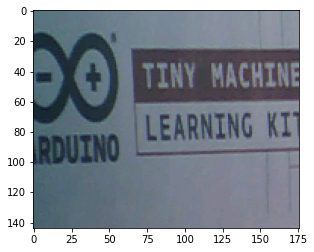

In [12]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()